In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

def match_plot(df,logy=False):
    df.iloc[0:-1,:].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5),xlabel="obs_id", ylabel=targets, title="model "+targets)
    df.iloc[-1,:].plot(logy=logy,legend=False,style="o",color='red');

# AC3 Step 1

In [4]:
# AC-MADS Step1 
path='../../dvm-dos-tem/mads_calibration/'
path_itr='../../dvm-dos-tem/scripts/'
model='out_AC3-STEP1-MD3-CR_IG.csv'
params='param_AC3-STEP1-MD3-CR_IG.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['AC3-STEP1-MD3-CR_IG1.finalresults']
targets='GPP'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

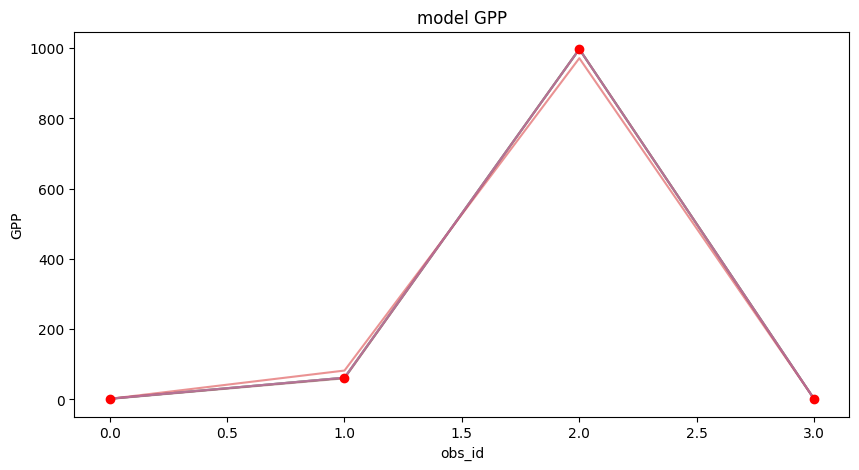

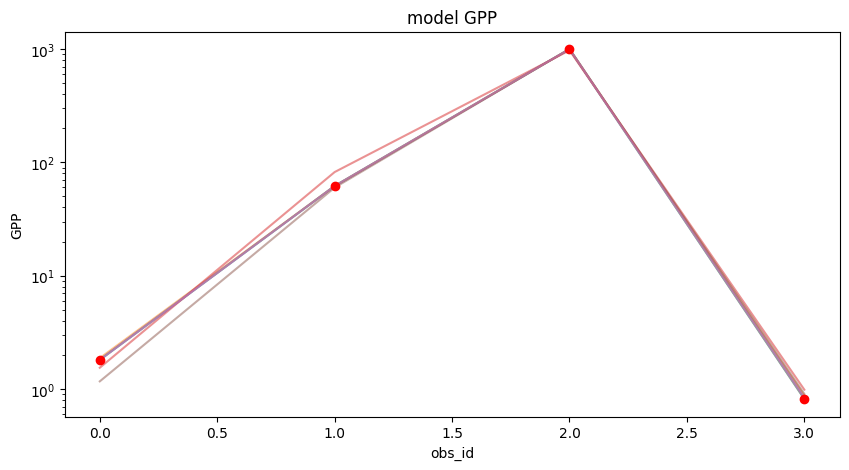

In [5]:
match_plot(df_model)
match_plot(df_model,logy=True)

# ut.match_plot(df_model.transpose(),target='GPP')

['2.793388882850204e-6', '0.0008175857380790369', '69.44401228187051', '0.1715723264704097', '1.079087447978125e7', '0.0010083852248775305', '7.0560219909670865', '40508.650435282914', '0.0007053271454708677', '0.007052621552781931']


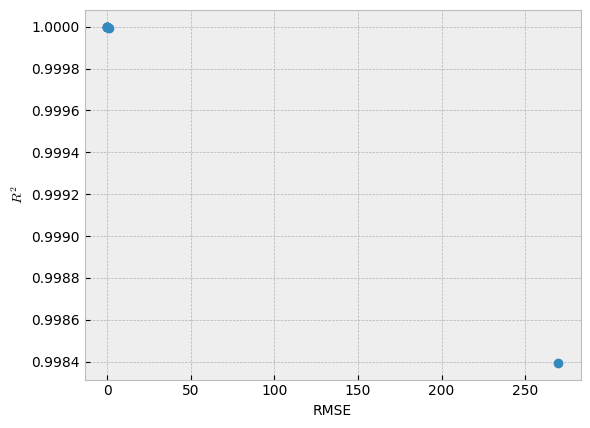

In [5]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
# ut.plot_err(err)

/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


../../dvm-dos-tem/scripts/AC3-STEP1-MD3-CR_IG1.finalresults


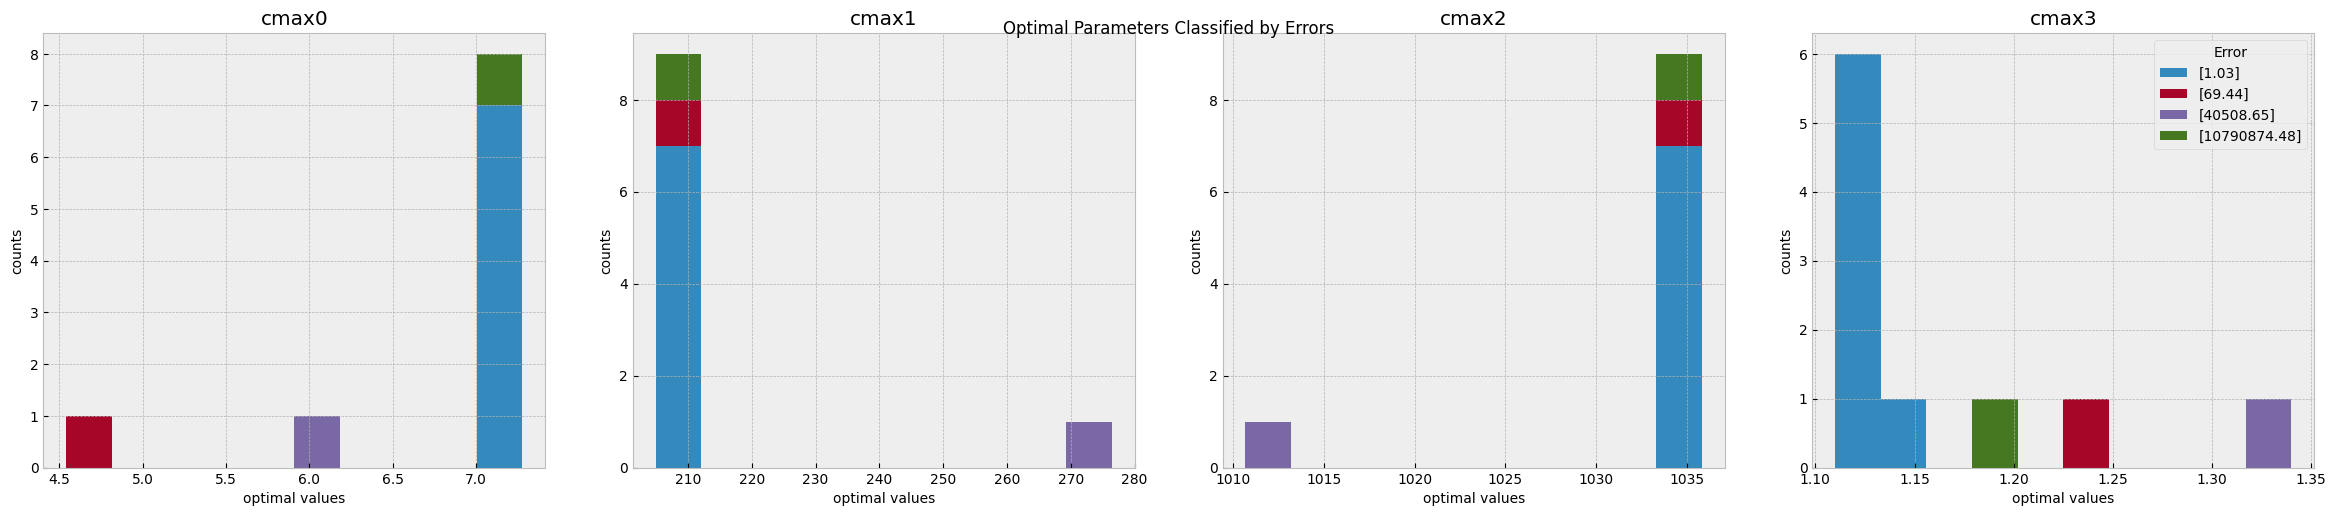

In [6]:
#Get error clusters
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

# #Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers,y_kmeans,y=26,r=5,c=4,std=0)
import os
for filename in filenames:
    print(os.path.join(path_itr, filename))

# AC3 Step2 - 105 runs total
prior informed initial guess

In [7]:
path='../../dvm-dos-tem/mads_calibration/'
path_itr='../../dvm-dos-tem/scripts/'
model='out-AC3-STEP2-MD3.csv'
params='param-AC3-STEP2-MD3.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

In [8]:
filenames = ['AC3-STEP2-MD3_1.finalresults', 'AC3-STEP2-MD3_2.finalresults', 'AC3-STEP2-MD3_3.finalresults',
            'AC3-STEP2-MD3_4.finalresults', 'AC3-STEP2-MD3_5.finalresults', 'AC3-STEP2-MD3_6.finalresults', 
            'AC3-STEP2-MD3_7.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

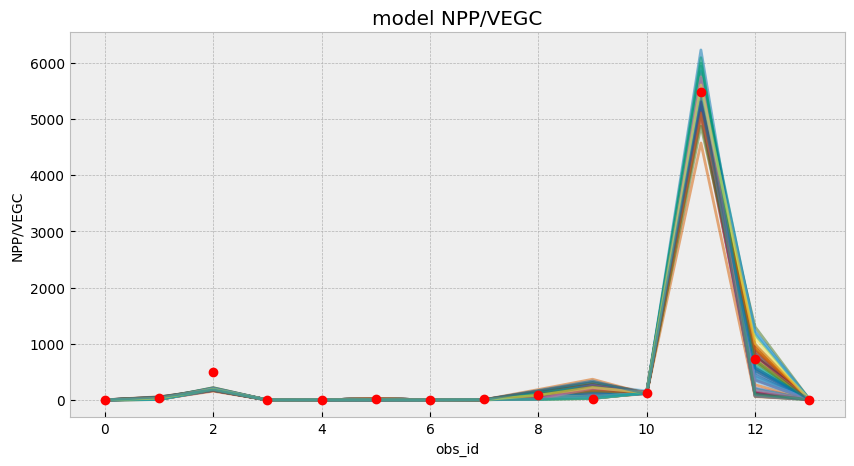

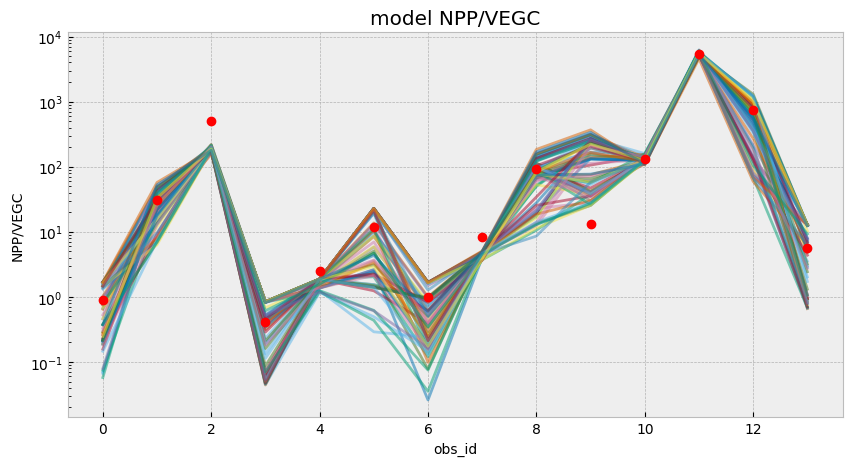

In [9]:
match_plot(df_model)
match_plot(df_model,logy=True)

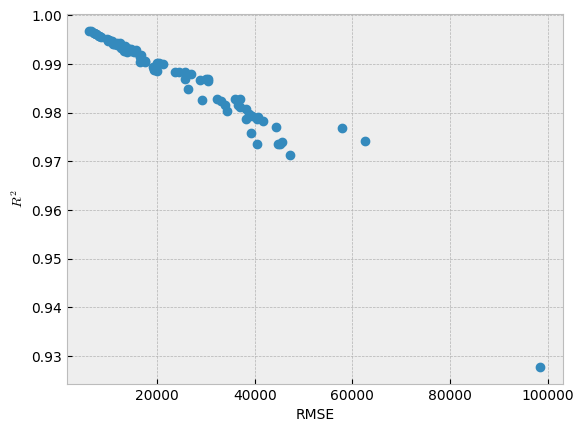

In [10]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

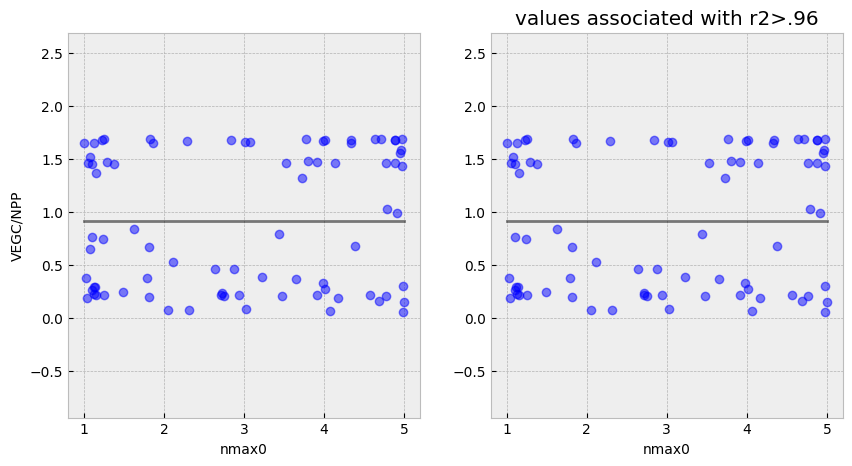

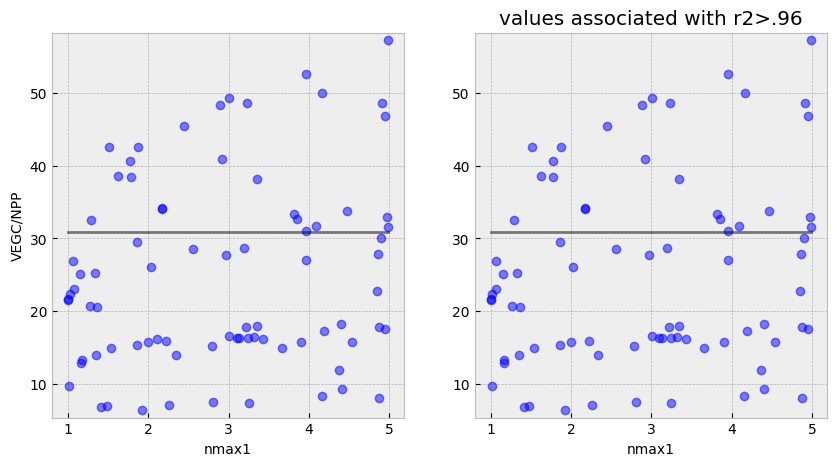

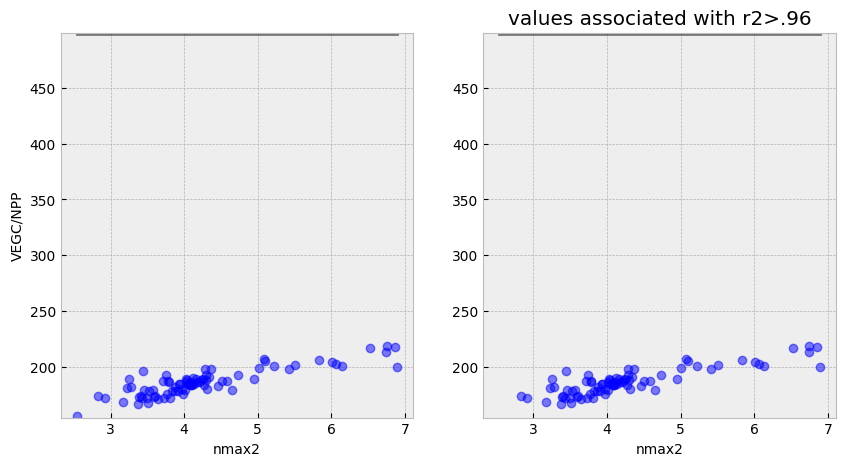

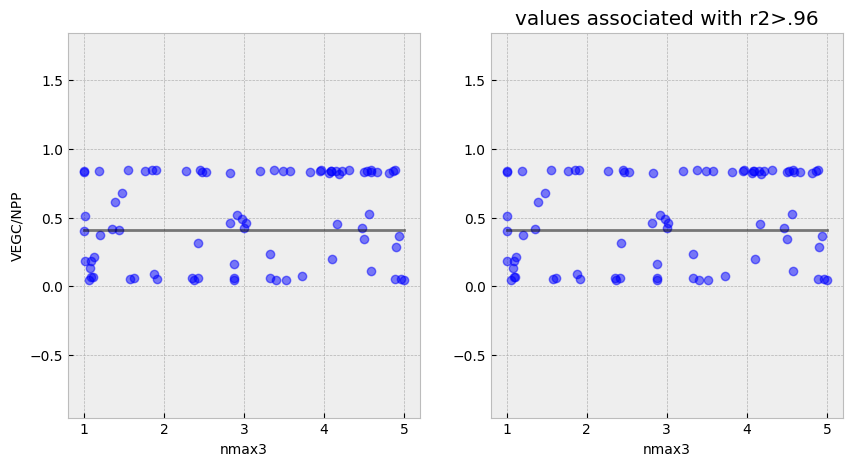

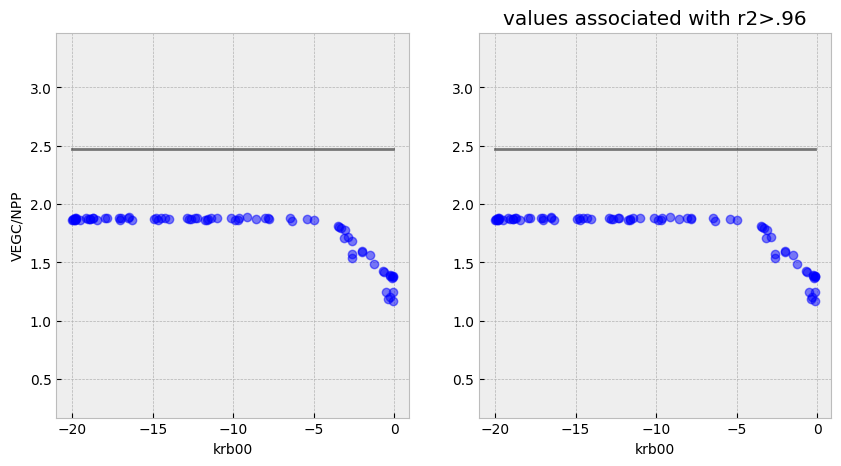

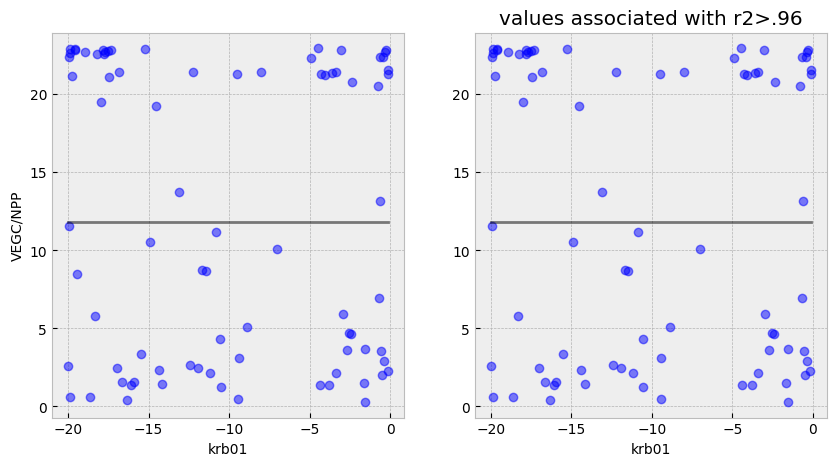

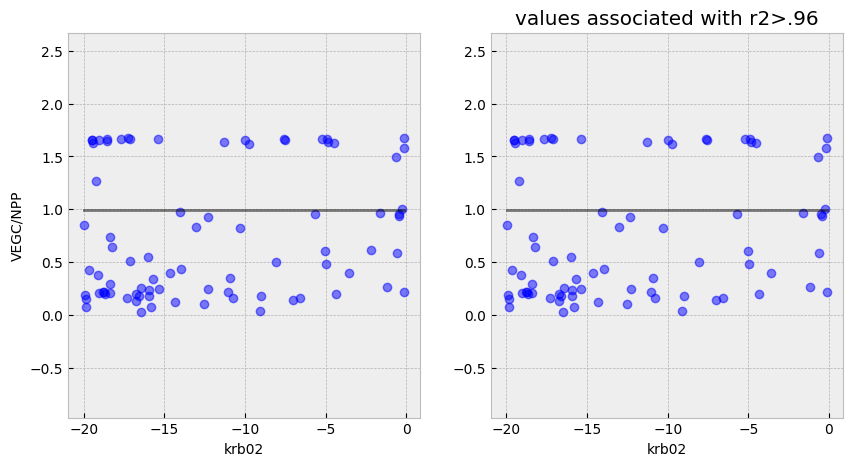

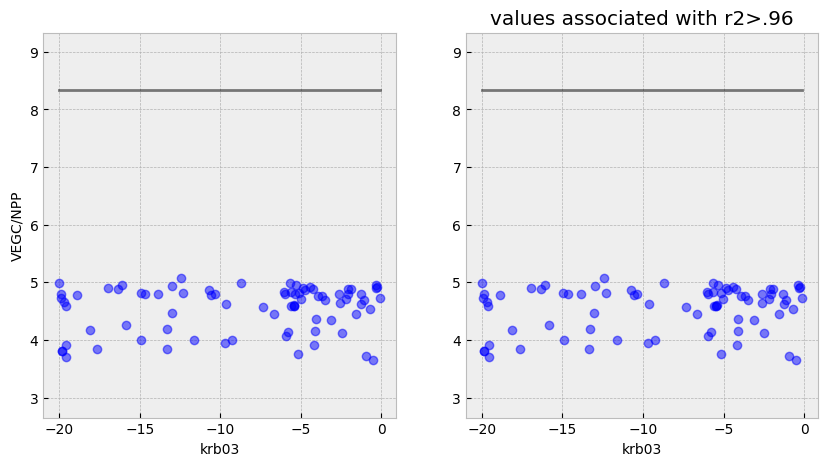

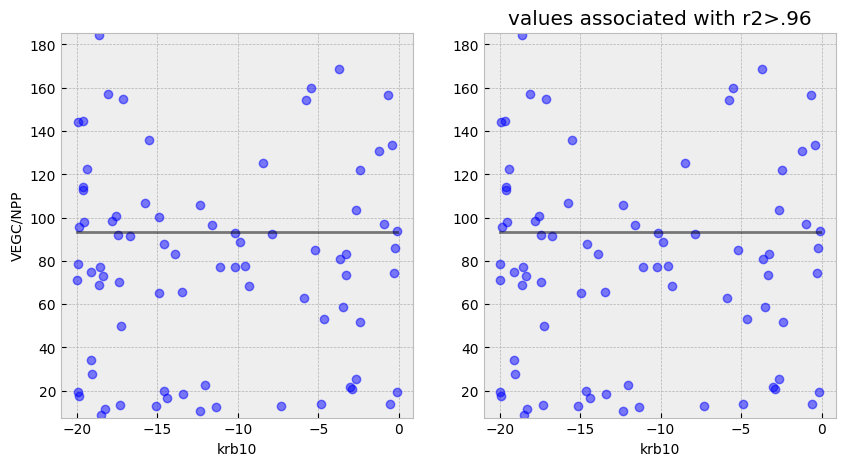

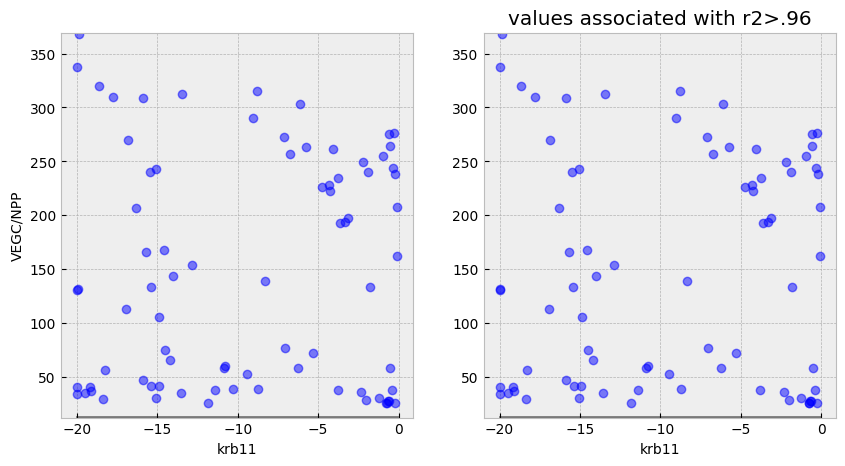

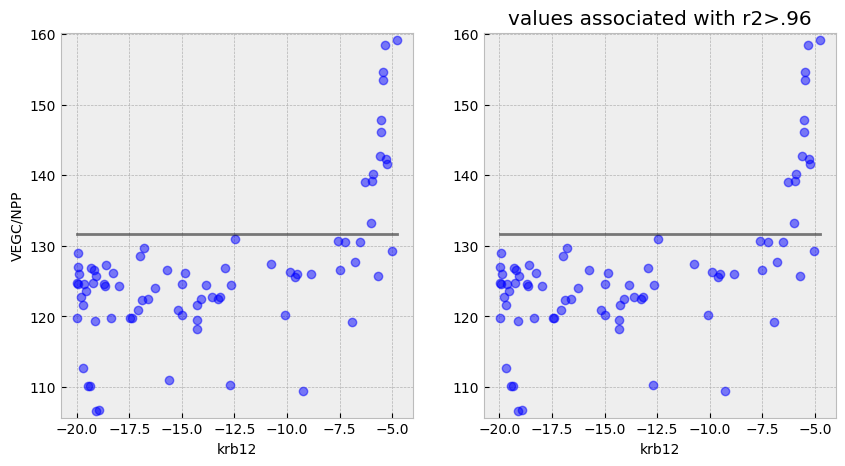

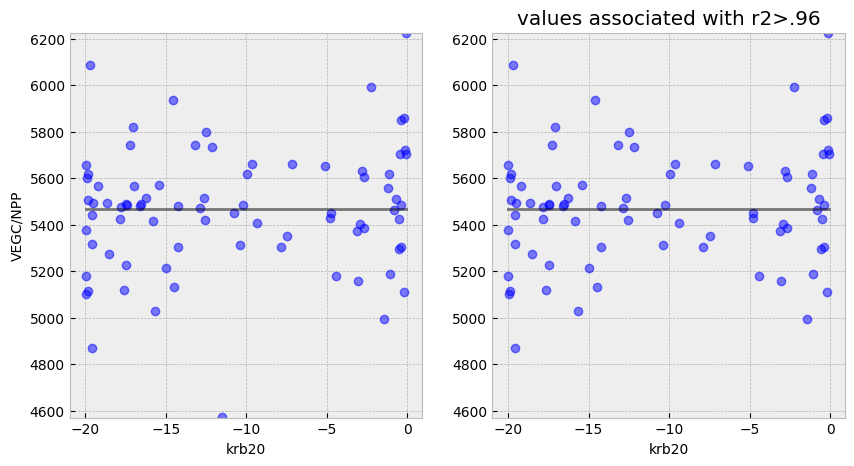

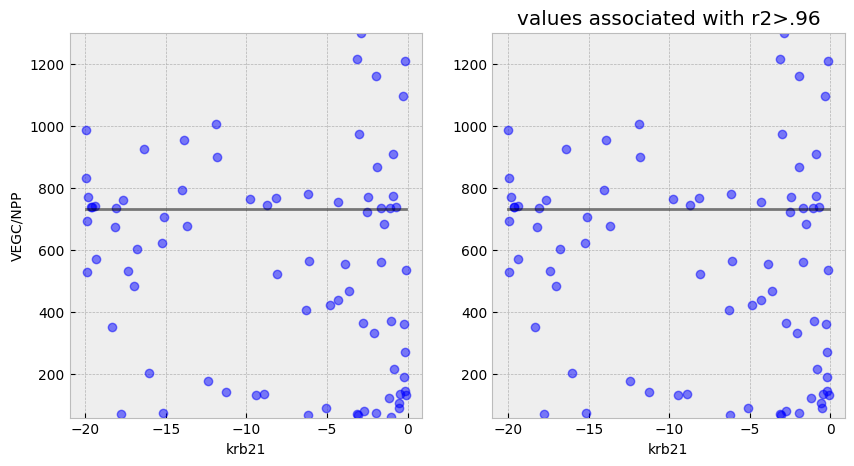

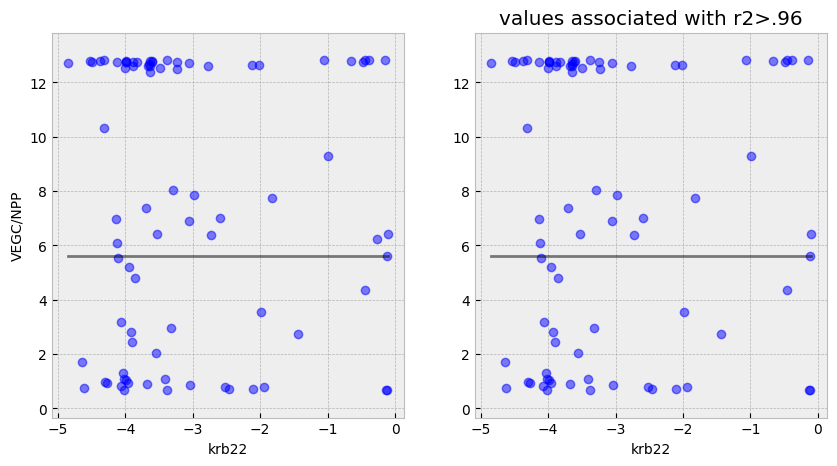

In [12]:
#this assumes a 1-1 relationship between obs and params
i=0
for item in mparams:
    plot_paramsvstarget(df_param,df_model,r2,i,xlabel=item,ylabel='VEGC/NPP')
    i=i+1

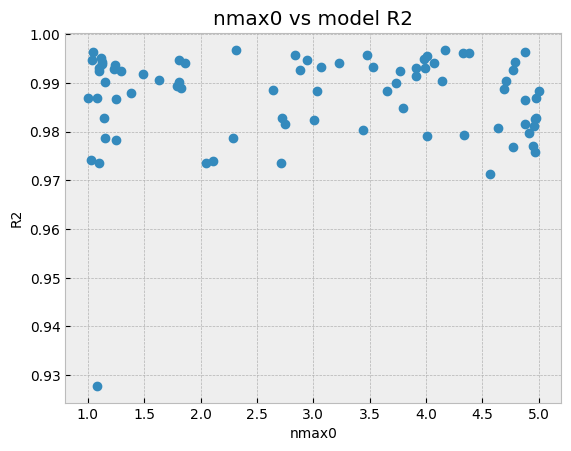

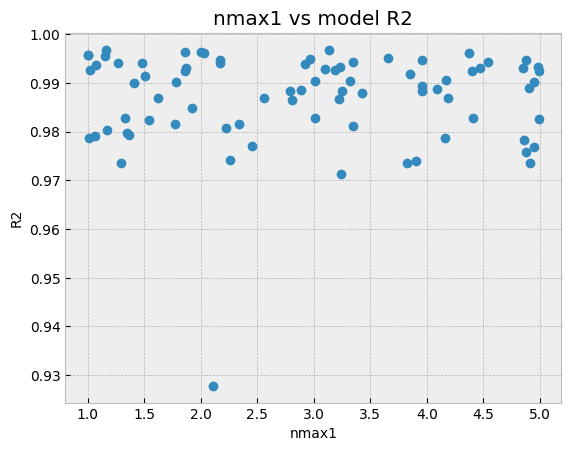

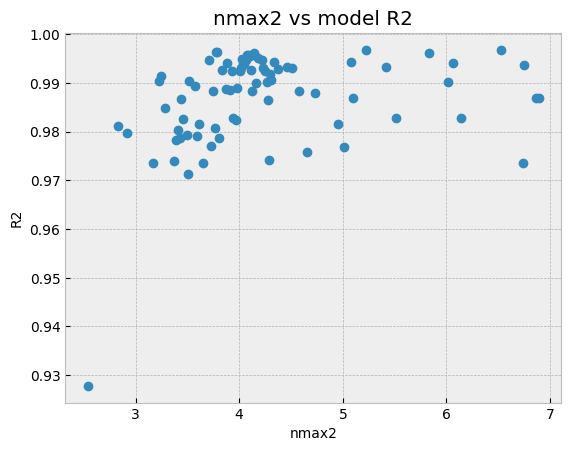

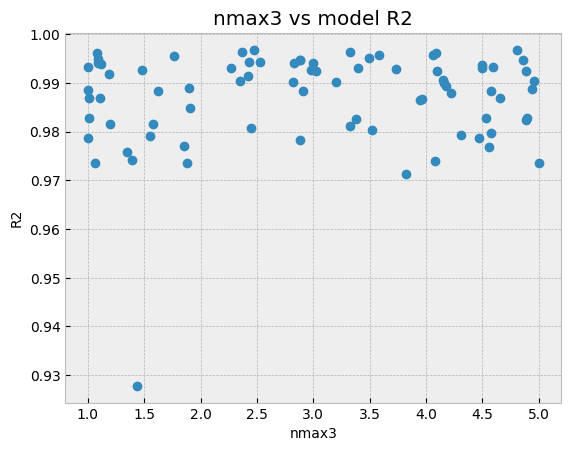

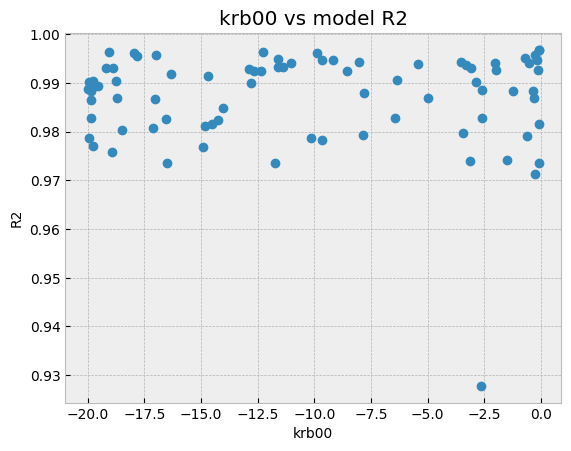

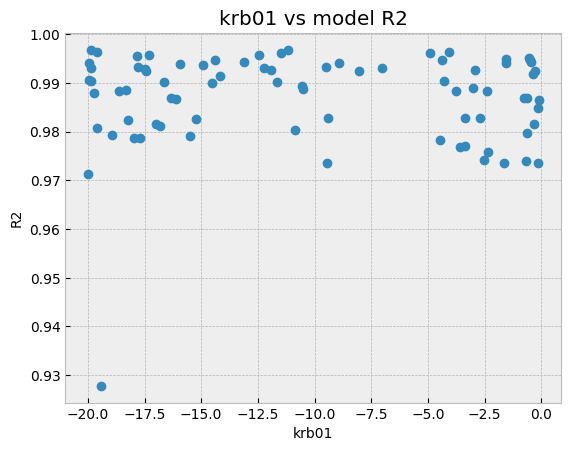

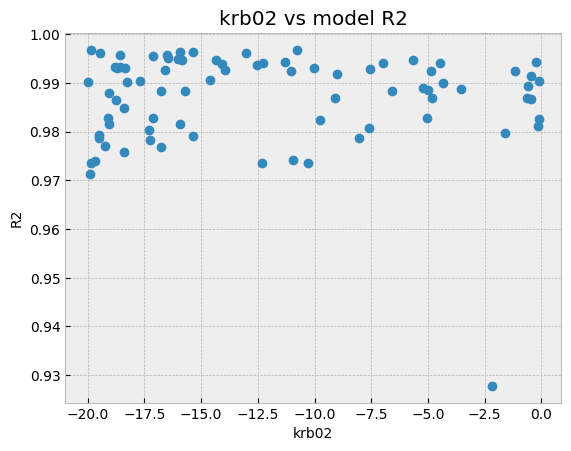

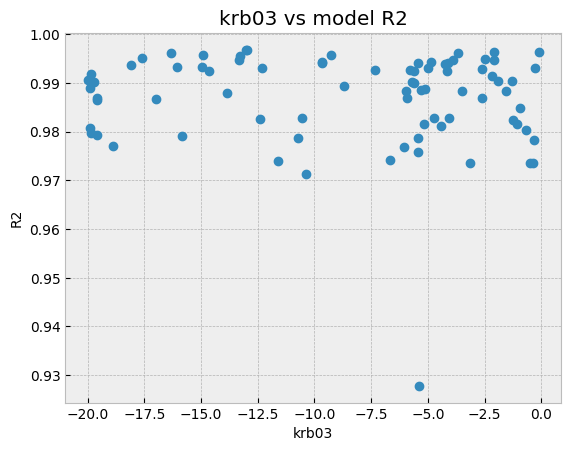

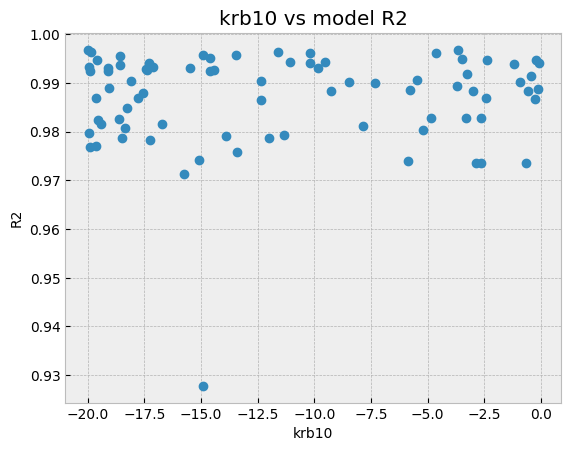

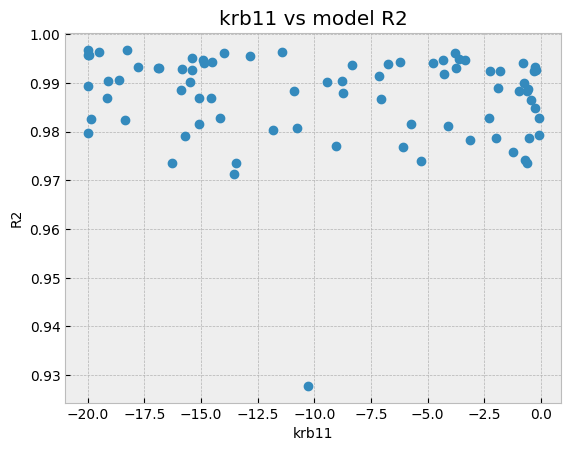

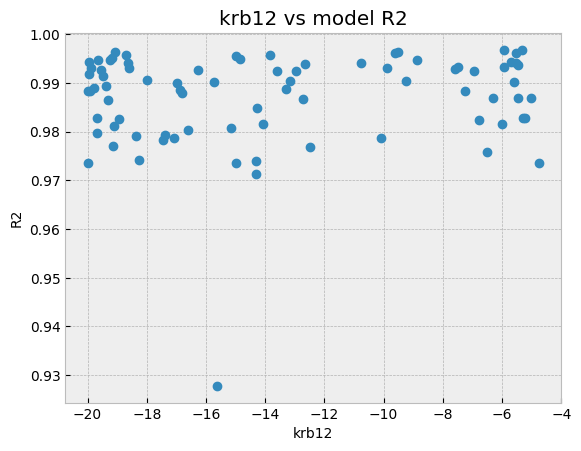

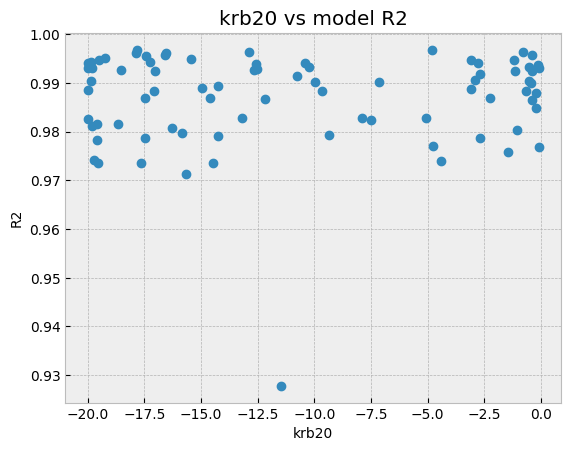

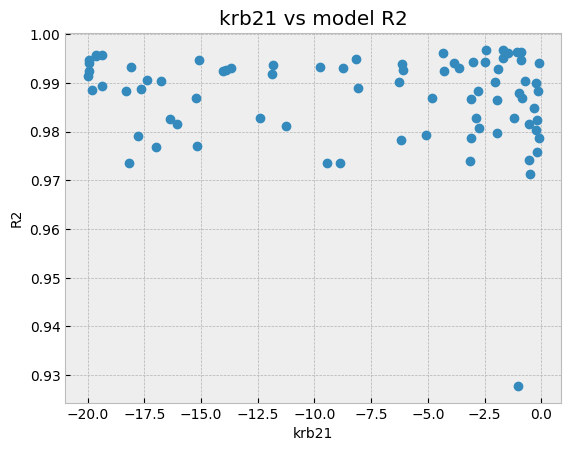

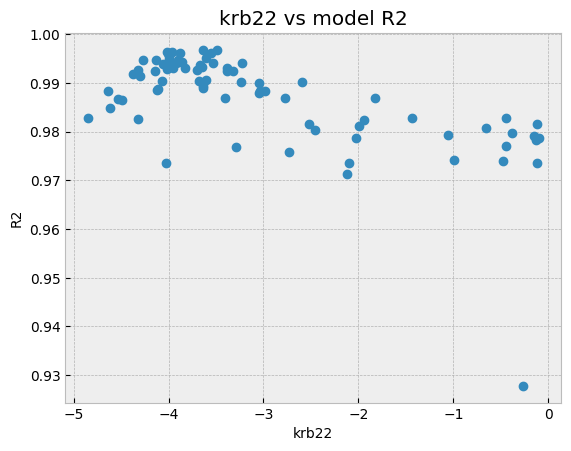

In [13]:
i=0
for item in mparams:
    plt.figure()
    plt.plot(df_param.iloc[:,i],r2,'o');
    plt.xlabel(item), plt.ylabel('R2');
    plt.title(item+' vs model R2')
    i=i+1

In [14]:
# AC Step3 - comparable to AC3 step 2
#Could not generate the out file correctly??
# path='../../dvm-dos-tem/mads_calibration/'
# model='out_AC-STEP3-MD3_CR_forcedist.csv'
# params='param_AC-STEP3-MD3_CR_forcedist.csv'
# df_model = pd.read_csv(path+model,header=None)
# df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3_CR_forcedist.finalresults', 'STEP3-MD3_CR_forcedist2.finalresults', 
      'STEP3-MD3_CR_forcedist3.finalresults', 'STEP3-MD3_CR_forcedist4.finalresults',
             'STEP3-MD3_CR_forcedist5.finalresults', 'STEP3-MD3_CR_forcedist6.finalresults']
targets='NPP/VEGC'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

# AC-MADS Step3 - no prior for initial guess

In [3]:
path='../../dvm-dos-tem/mads_calibration/'
path_itr='../../dvm-dos-tem/mads_calibration'
model='out_STEP3-MD3-CR-noprior.csv'
params='param_STEP3-MD3-CR-noprior.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)

filenames = ['STEP3-MD3-CR-noprior_1.finalresults', 'STEP3-MD3-CR-noprior_2.finalresults', 'STEP3-MD3-CR-noprior_3.finalresults',
      'STEP3-MD3-CR-noprior_4.finalresults', 'STEP3-MD3-CR-noprior_5.finalresults', 'STEP3-MD3-CR-noprior_6.finalresults',
      'STEP3-MD3-CR-noprior_7.finalresults']
targets='NPP/VEGC/VEGN'
mparams=ut.get_all_optimal_sets_of_params(path_itr, filenames)

In [4]:
mparams=ut.get_optimal_sets_of_params(path+filenames[0]) 
for i in filenames[1:]:
    mparams = ut.merge_parameter(mparams, ut.get_optimal_sets_of_params(path+i))

['1.6466577157668924e10', '3.69788792944791e10', '4.4133740424830475e9', '4.476222654664731e9', '9.295524214217215e9', '2.903047292676514e9', '7.588190246544192e9', '4.770065319015016e9', '2.554437580175758e10', '1.1242795083269922e10', '6.475838037784684e9', '3.2064837501824727e9', '1.6335128387299234e10', '3.8965544289540668e9', '1.601238027738714e10', '8.589779212668712e9', '1.8932057284206011e9', '2.649191699822669e10', '2.2067188043103745e10', '4.2725071917877774e9', '2.49181084106985e10', '3.0245303454003414e10', '8.135724678679095e9', '2.734783947021159e9', '2.8464862135973134e9', '1.22793086212523e10', '4.930145491262282e9', '6.842709392552009e9', '9.298569306965056e10', '7.8540790388691025e9', '8.427063202303281e9', '7.970167385926865e9', '1.642440009853605e10', '1.0603465618861303e8', '1.3053753674975862e8', '7.253493346589989e9', '1.361636062164636e10', '1.917386459944789e10', '5.258262419697375e9', '2.2057452690774952e10', '7.6830172685855875e9', '5.740341450825839e9', '8.9

/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/aizax/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: num must be an integer with 1 <= num <= 32, not 33

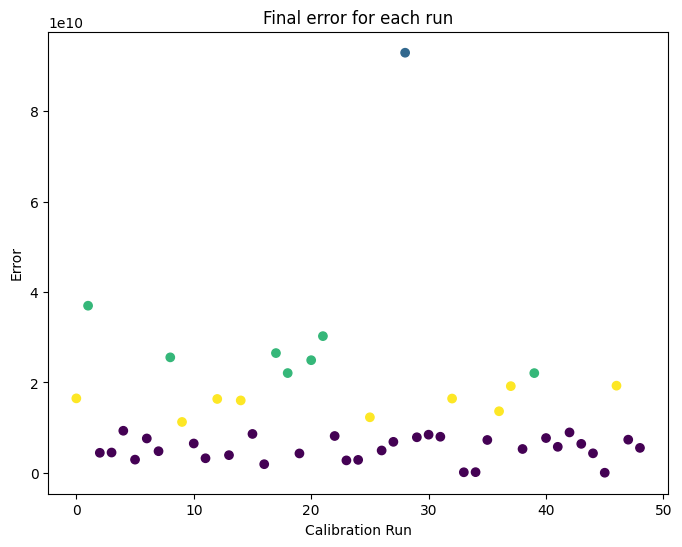

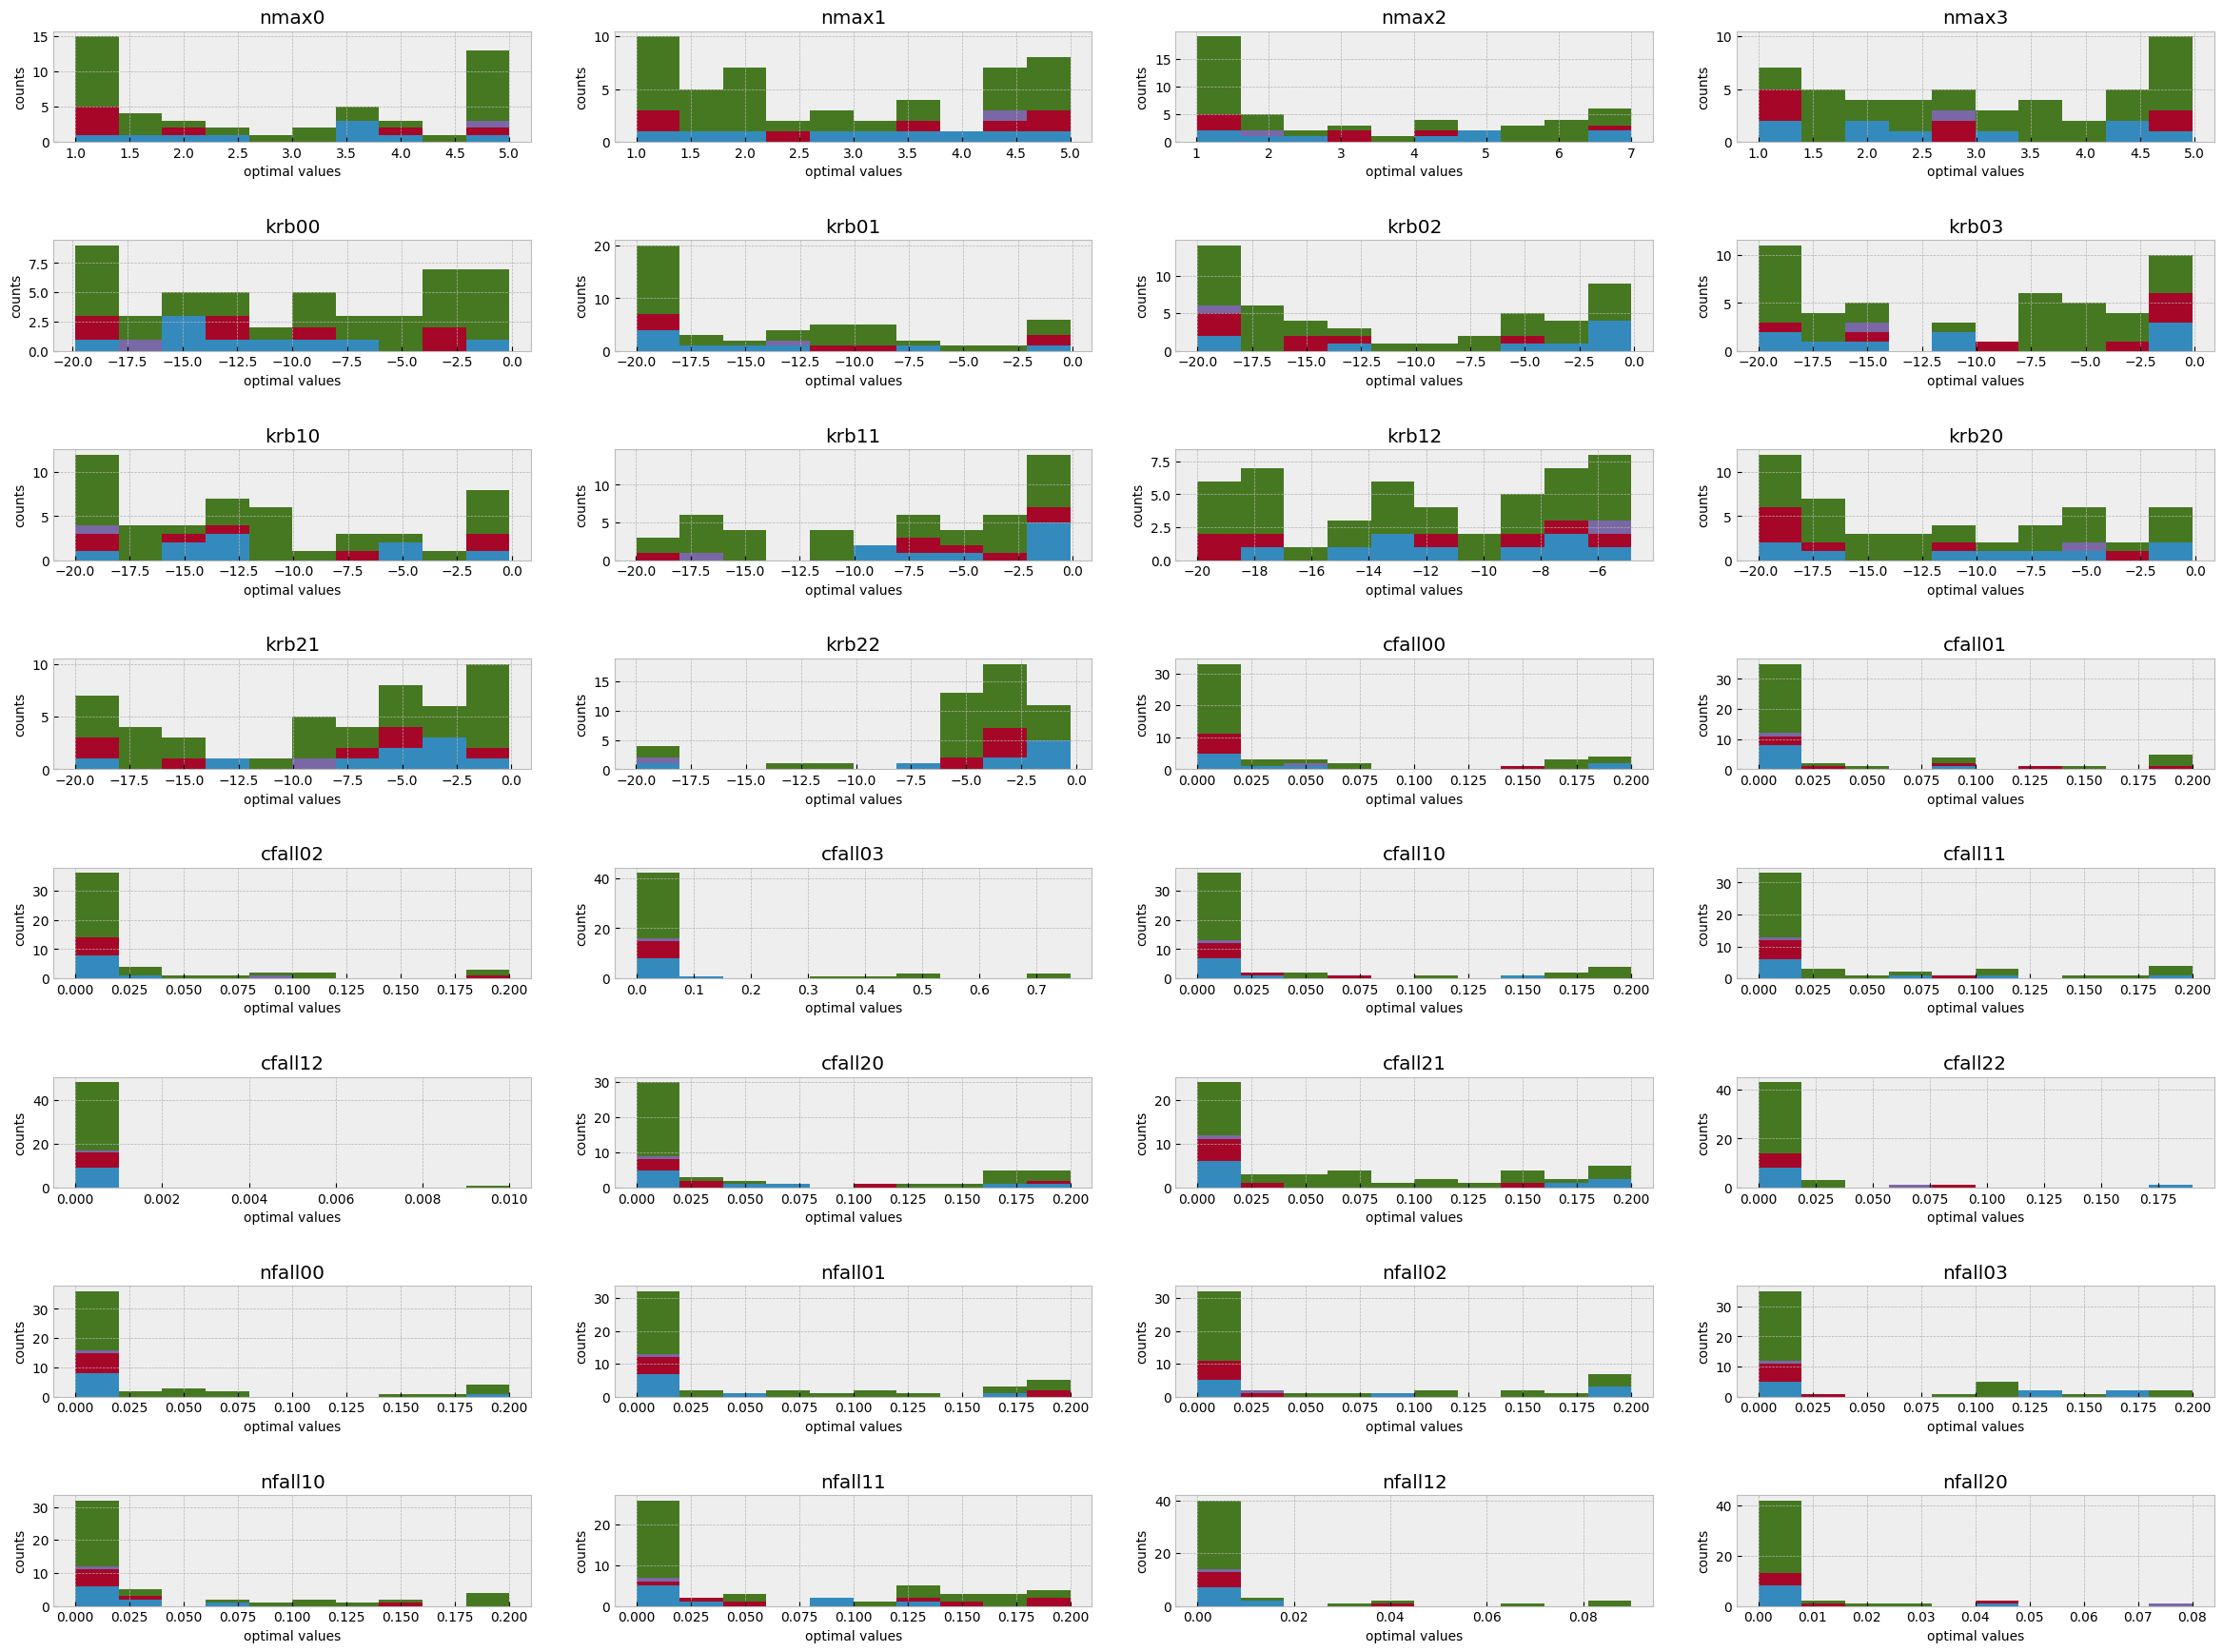

In [5]:
#plot errors
err=ut.get_error(path_itr, filenames)
print(err)
ut.plot_err(err)

#Get error clusters 
float_err=[float(x) for x in err]
rounded_err=list(np.round(float_err,7))
y_kmeans,centers=ut.get_err_clusters(float_err)

#Organize parameters values by kmeans clusters
ut.plot_stacked_histograms(mparams,centers, y_kmeans, r=8, y=18, nbins=10, std=0)

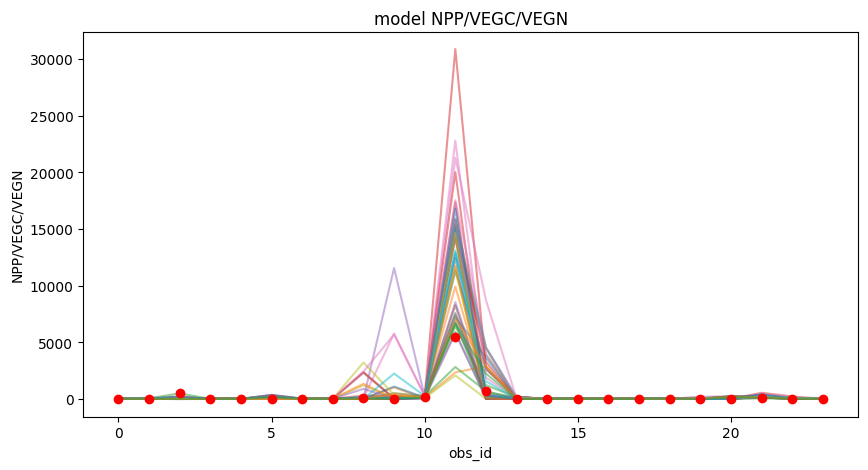

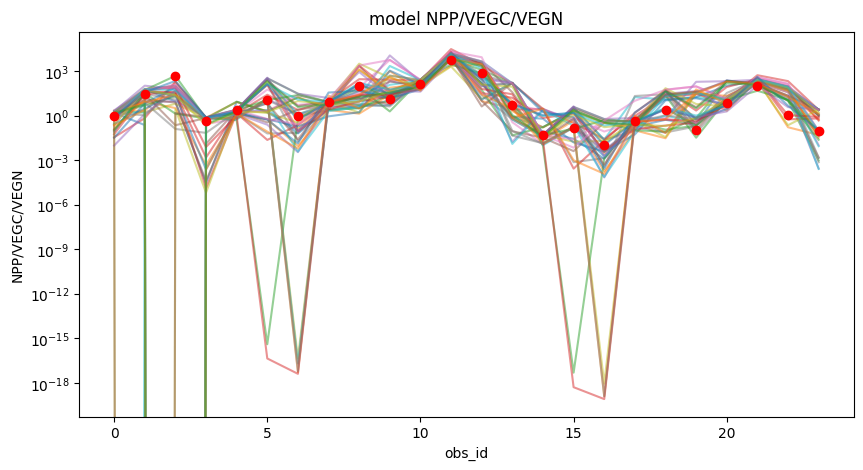

In [7]:
match_plot(df_model)
match_plot(df_model,logy=True)

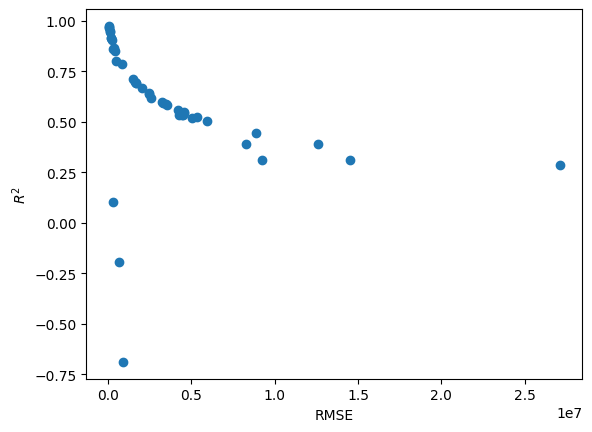

In [8]:
[n,m]=np.shape(df_model)
r2=[r2_score(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
rmse=[mean_squared_error(df_model.iloc[i,:], df_model.iloc[-1,:]) for i in range(n-1)]
r2=np.asarray(r2)
rmse=np.asarray(rmse)
plt.plot(rmse,r2,'o'), plt.xlabel('RMSE'), plt.ylabel('$R^2$');

/tmp/ipykernel_1942699/573042984.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


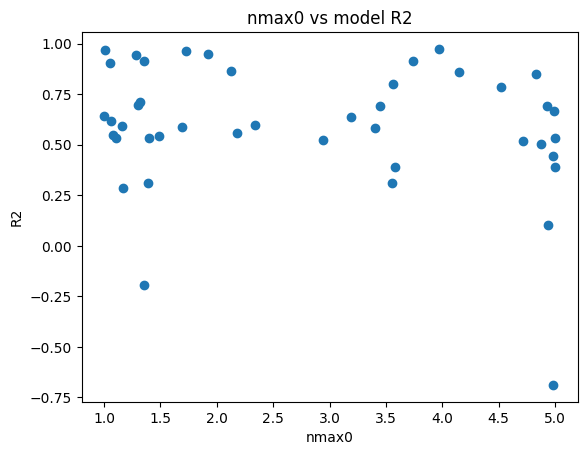

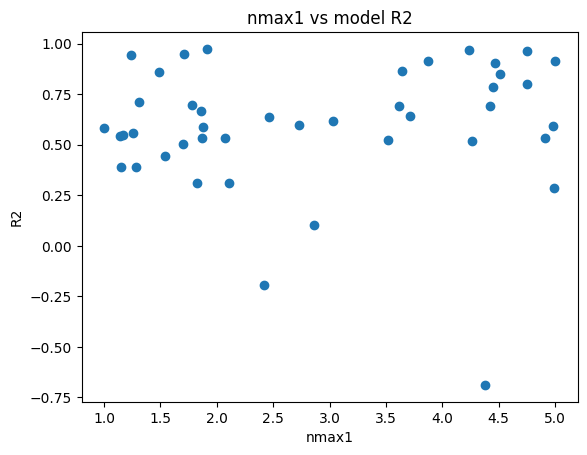

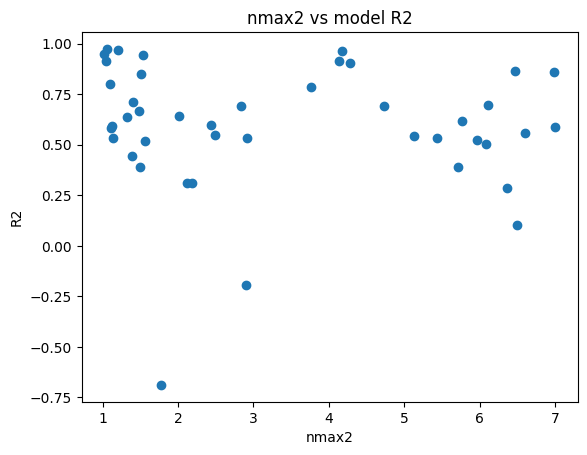

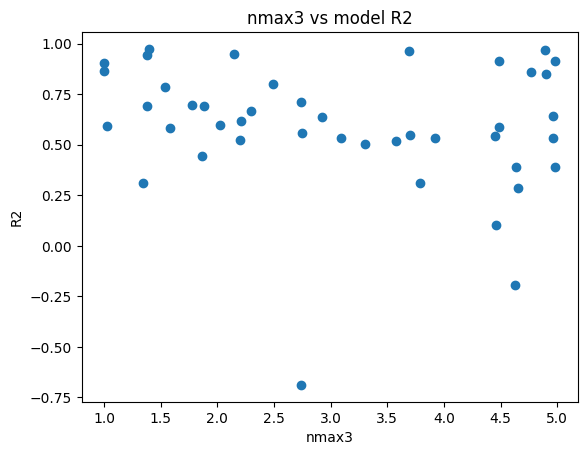

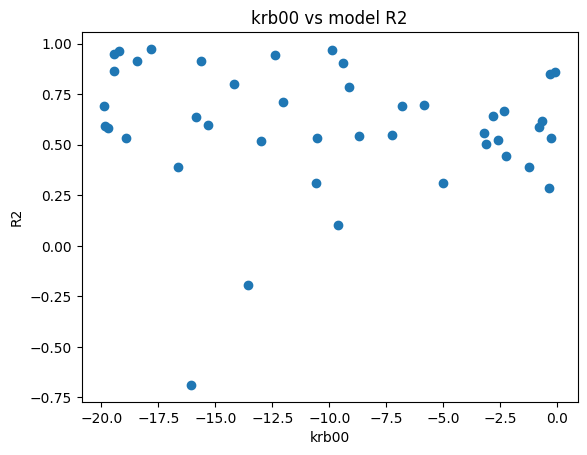

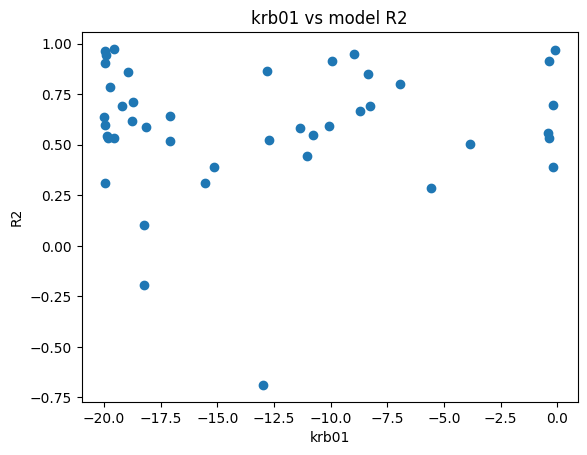

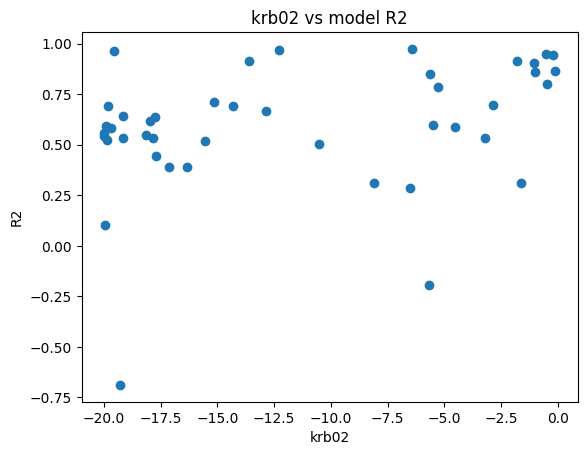

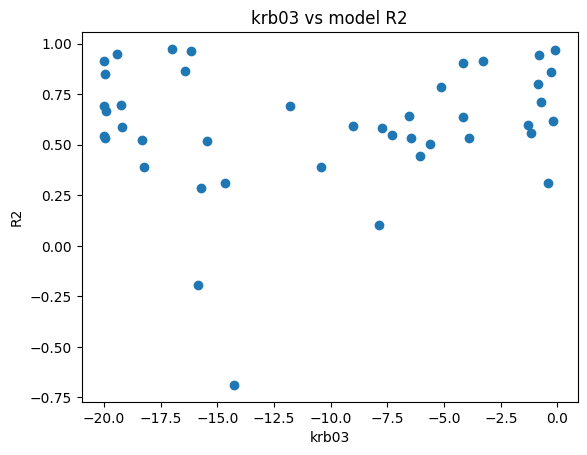

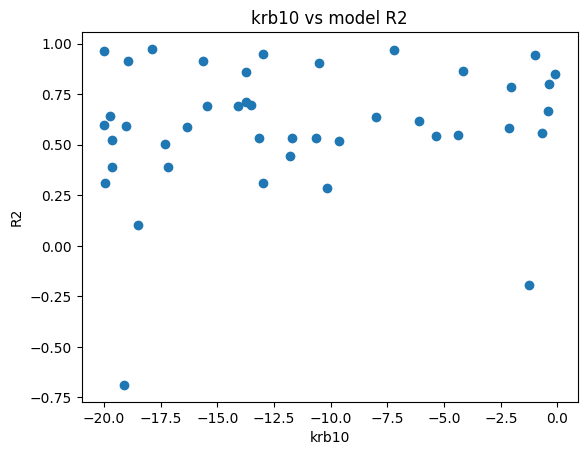

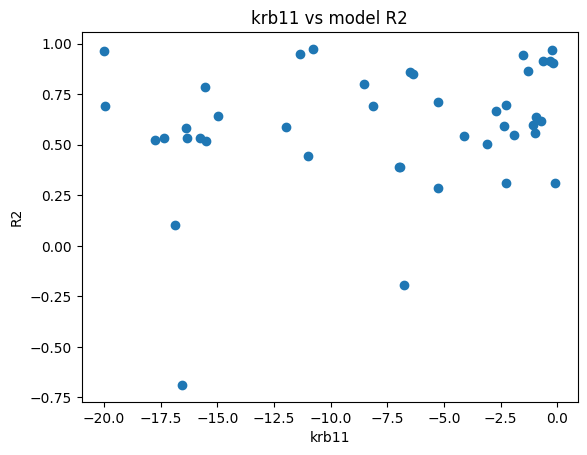

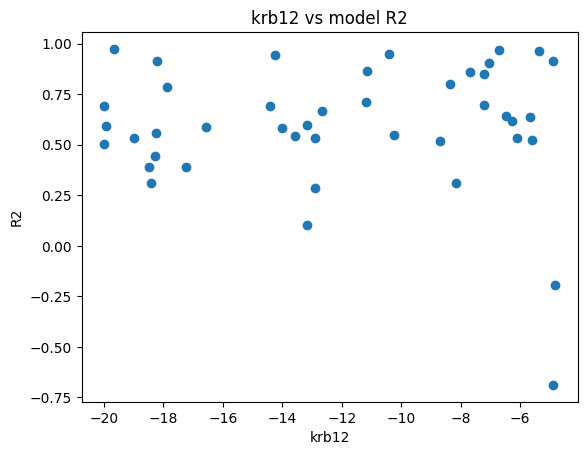

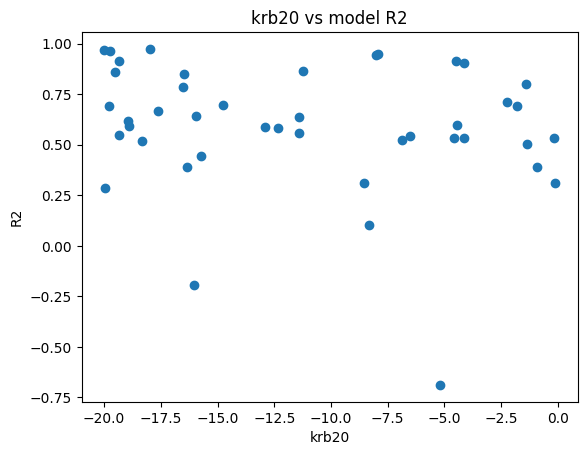

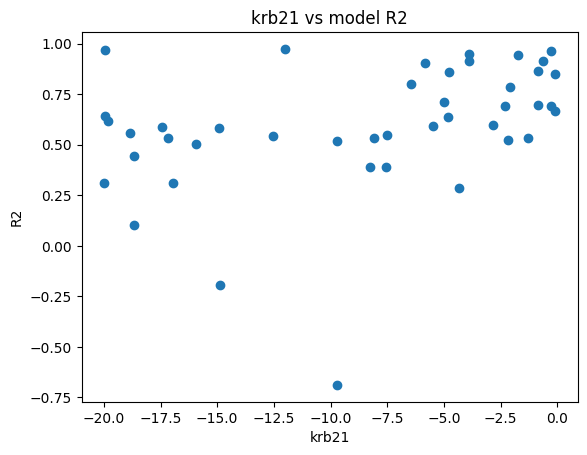

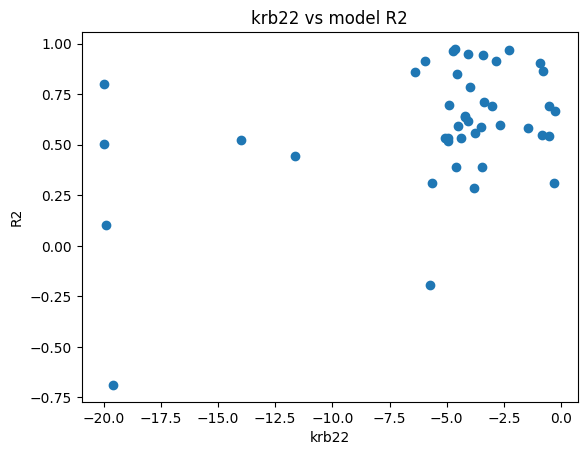

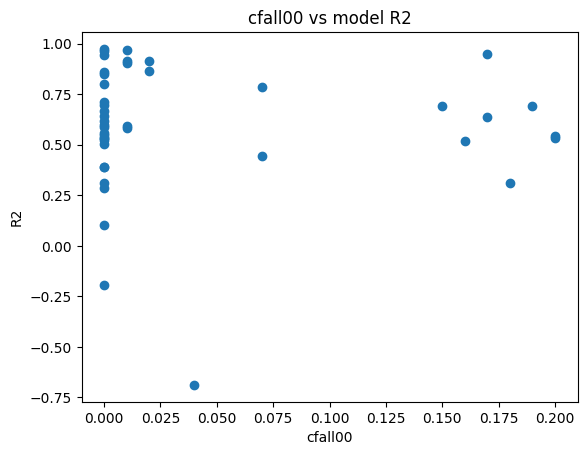

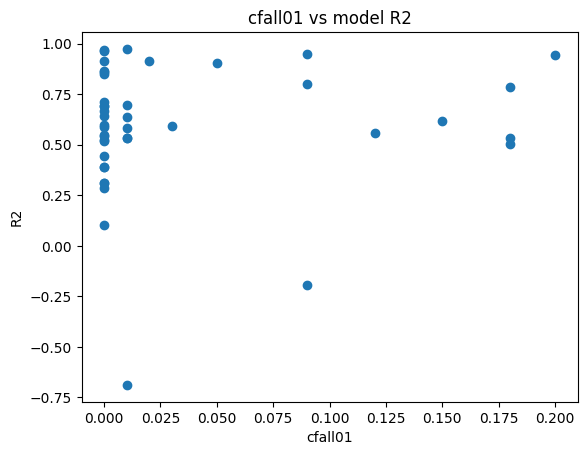

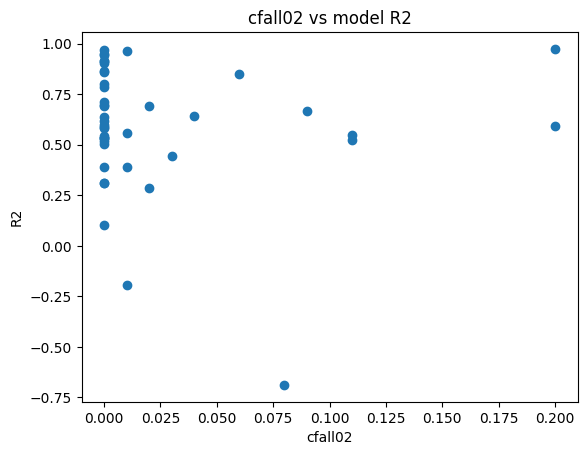

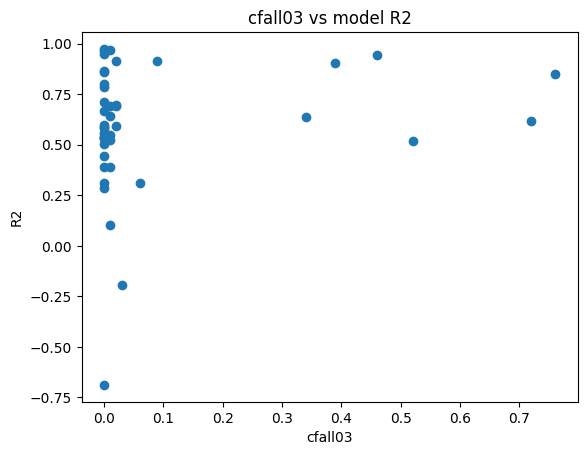

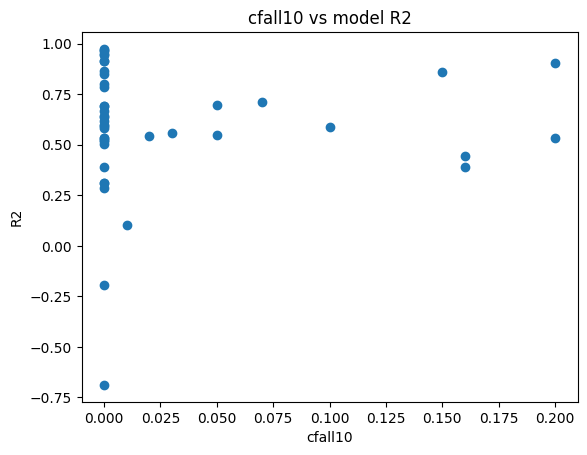

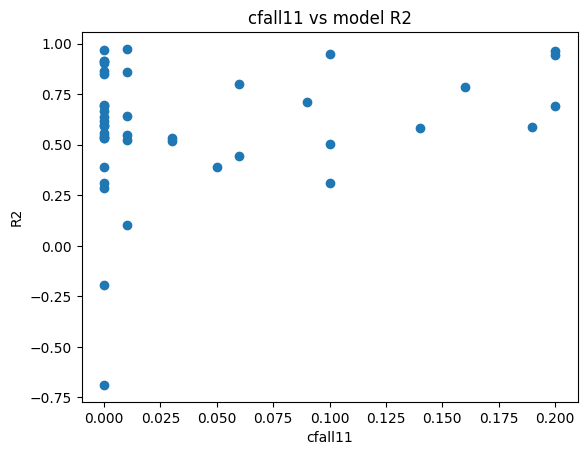

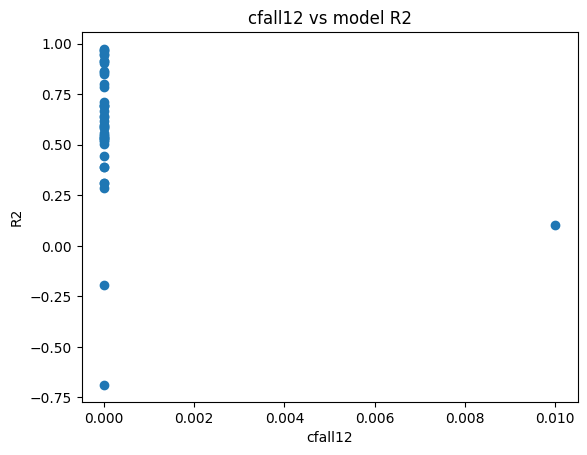

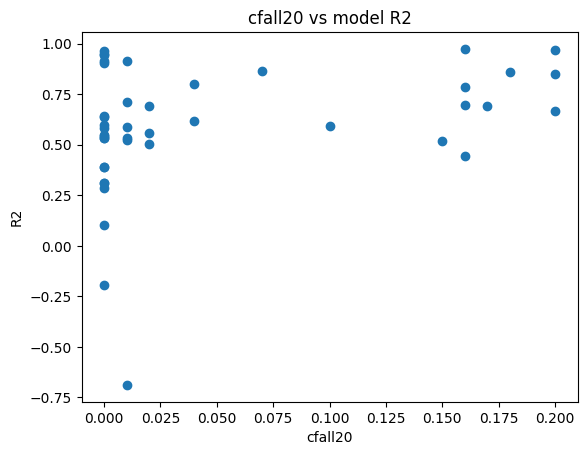

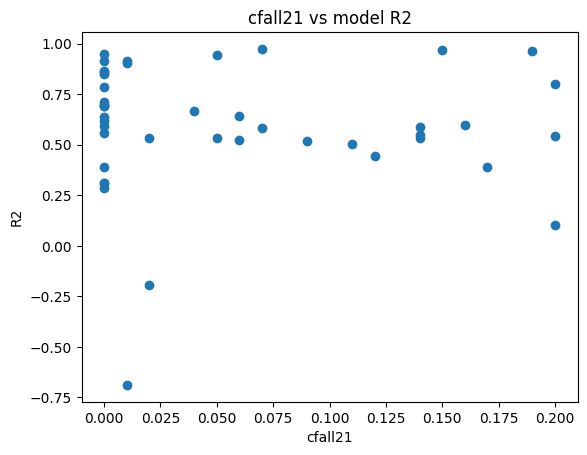

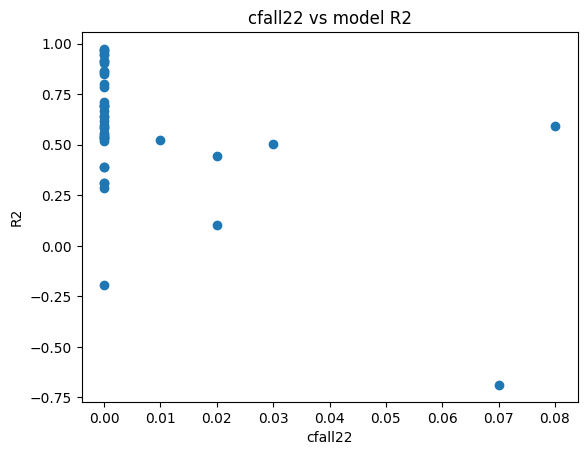

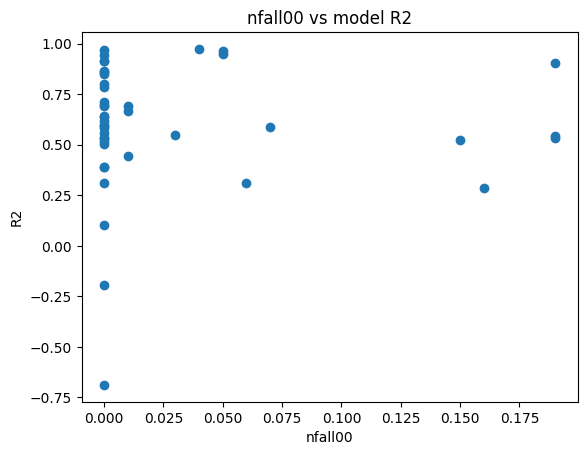

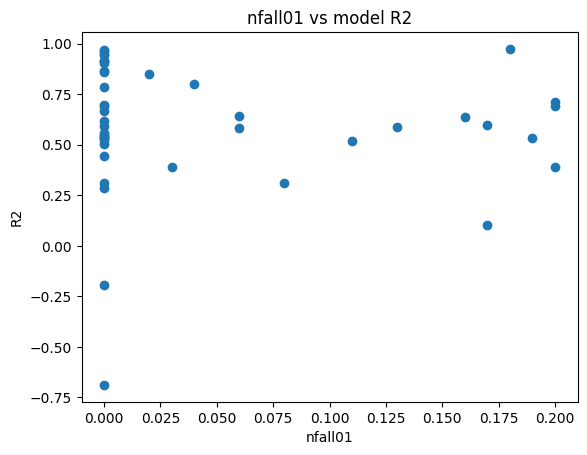

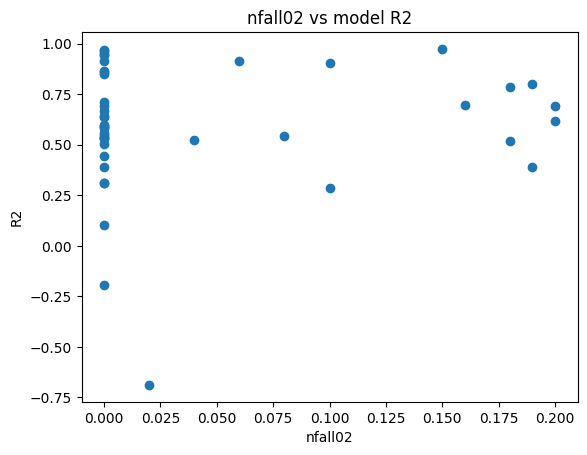

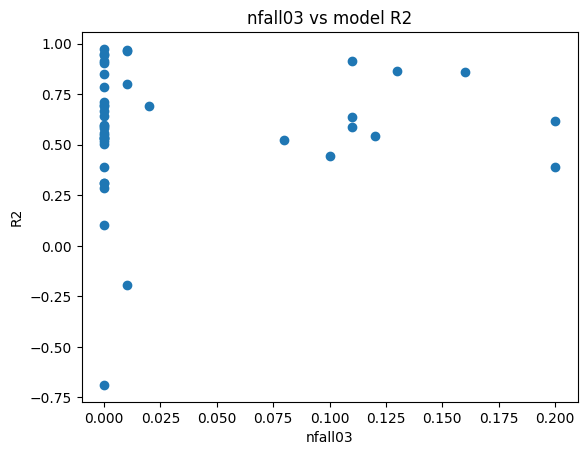

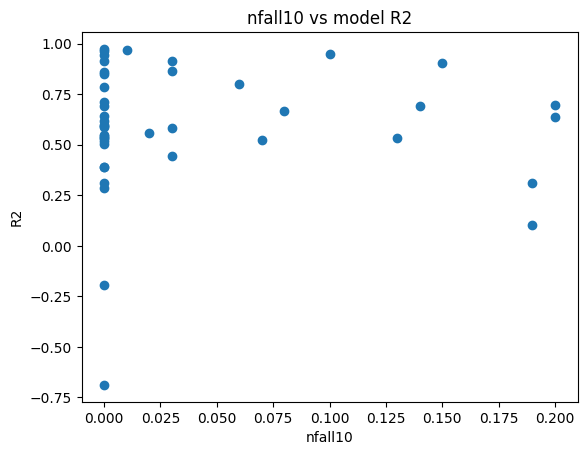

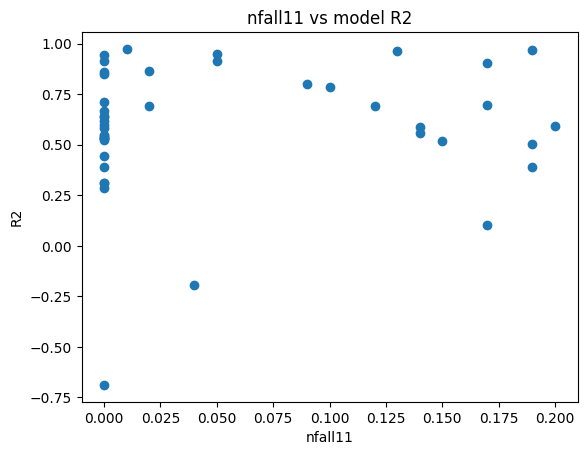

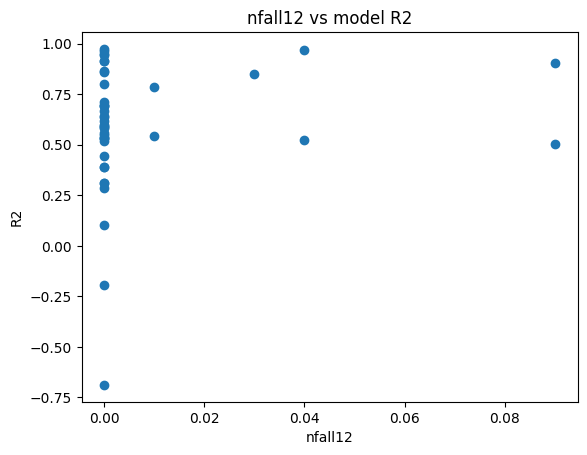

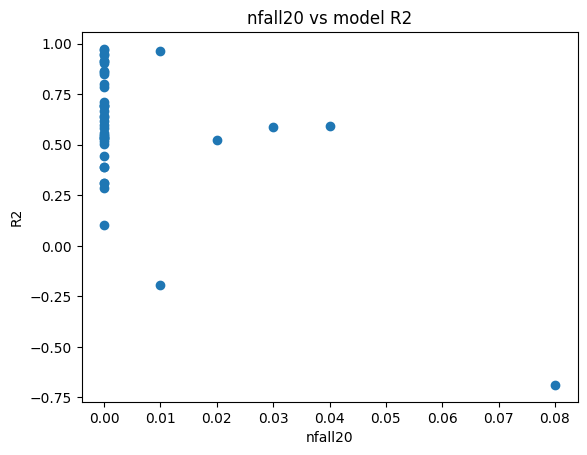

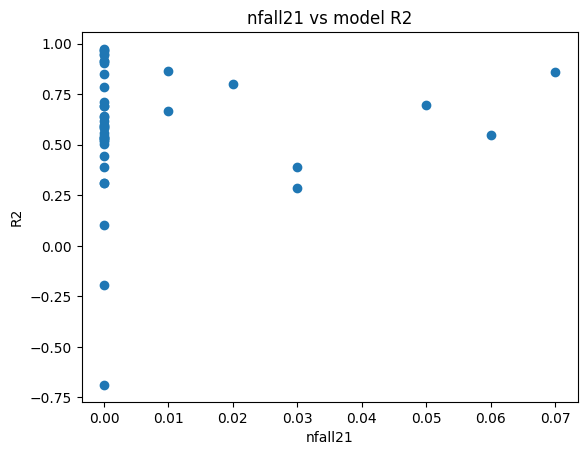

In [10]:
i=0
for item in mparams:
    plt.figure()
    plt.plot(df_param.iloc[:,i],r2,'o');
    plt.xlabel(item), plt.ylabel('R2');
    plt.title(item+' vs model R2')
    i=i+1

/tmp/ipykernel_1942699/889768823.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


IndexError: single positional indexer is out-of-bounds

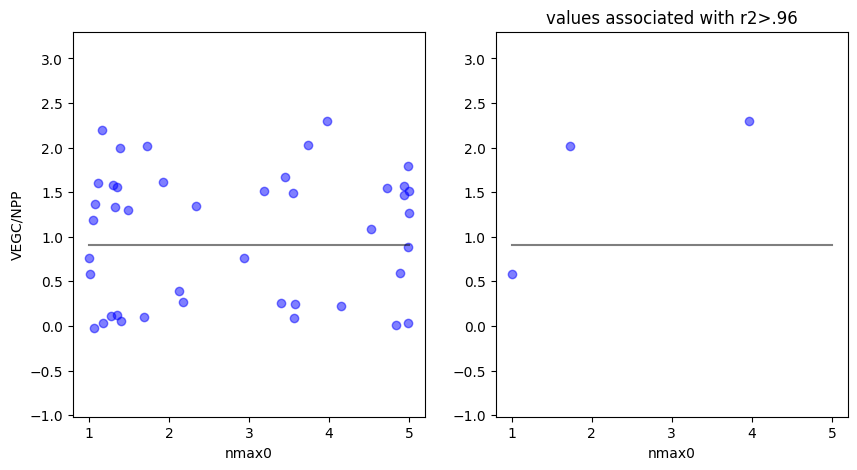

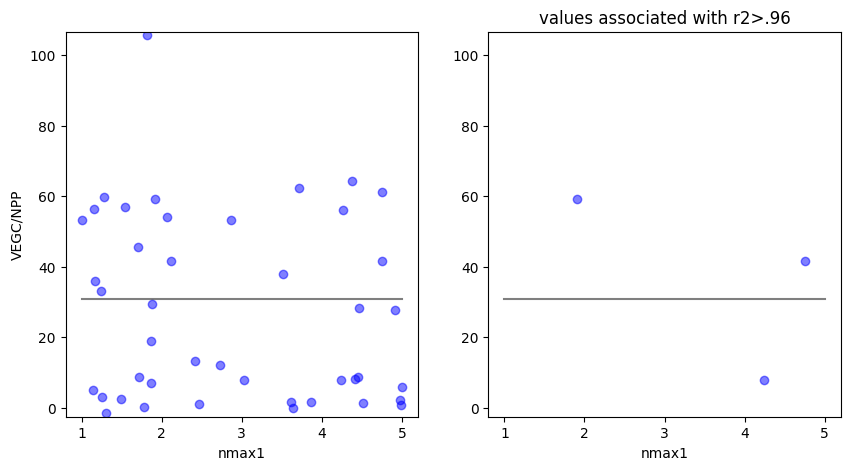

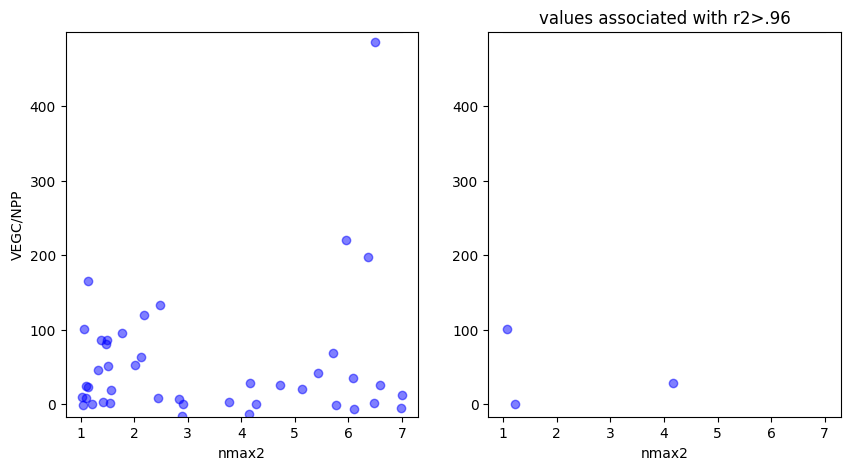

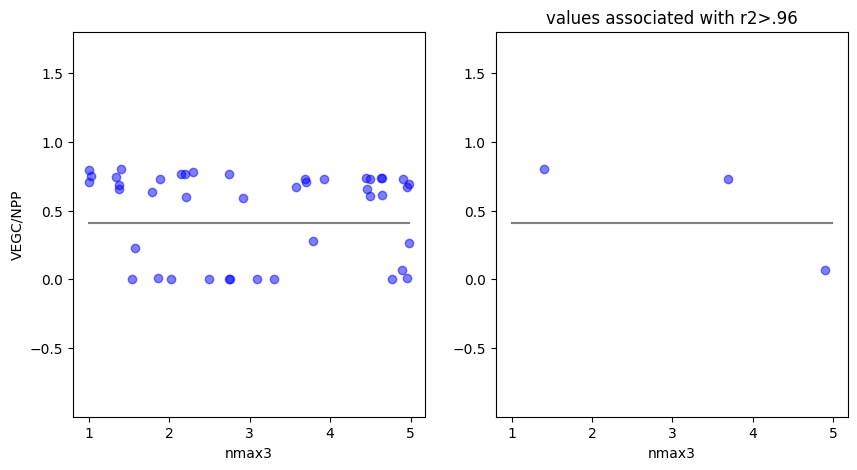

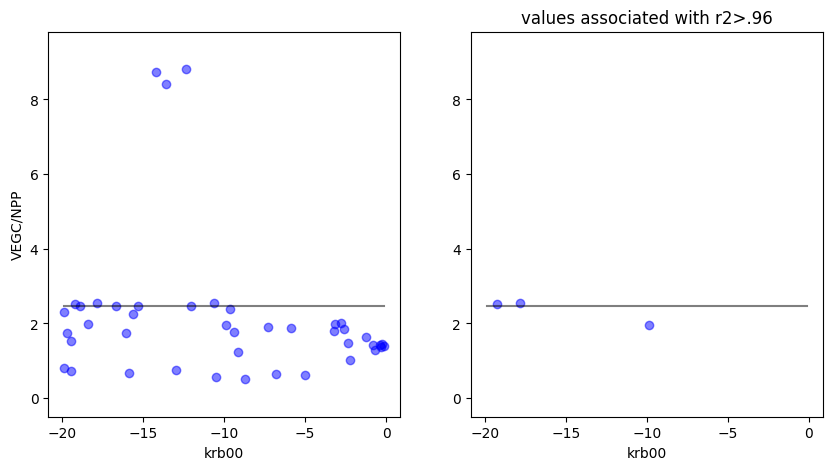

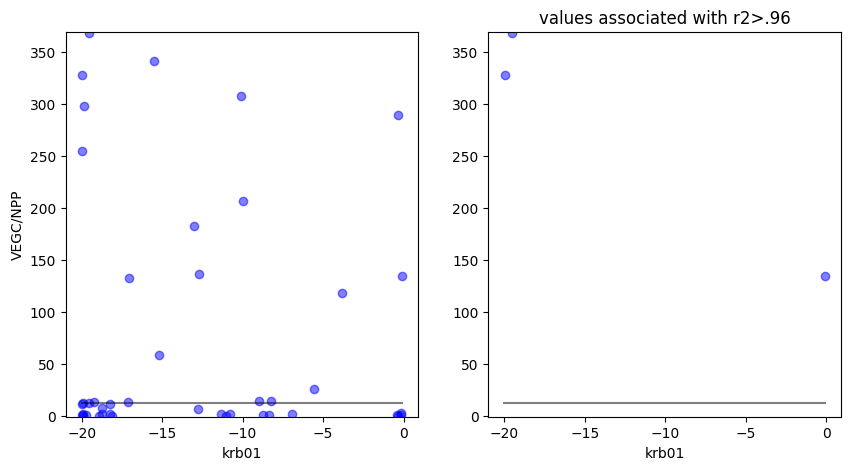

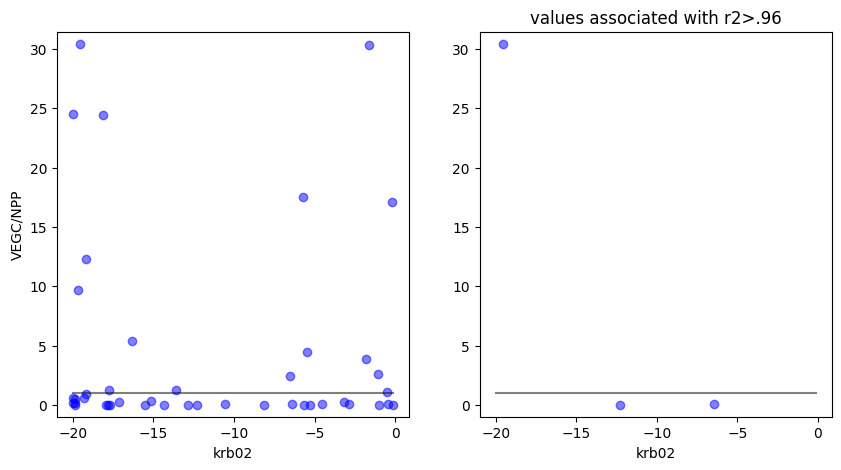

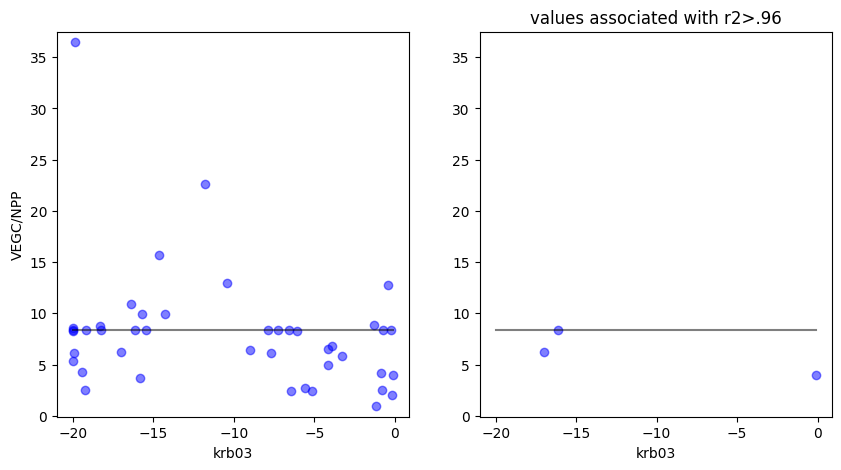

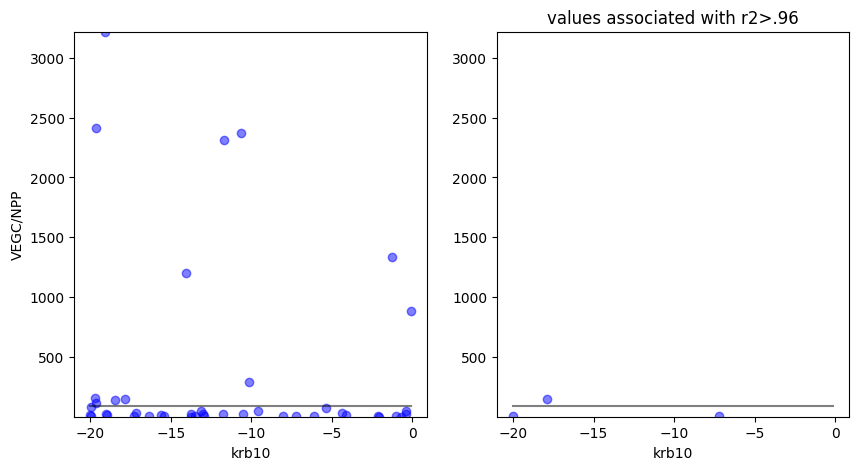

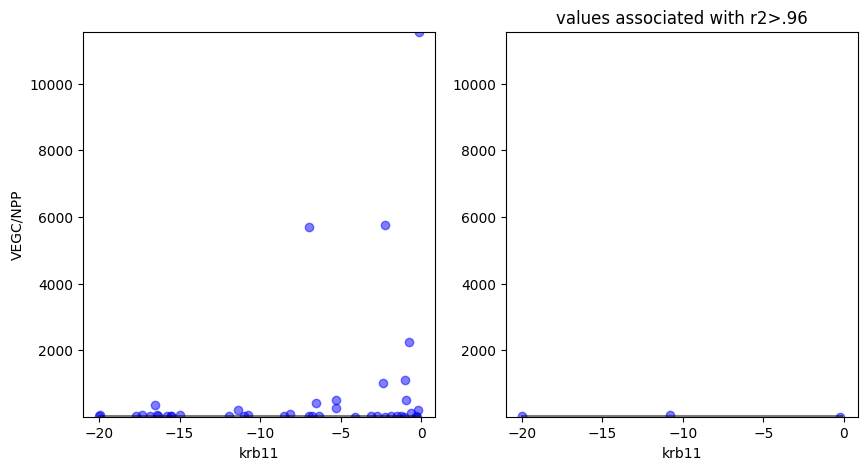

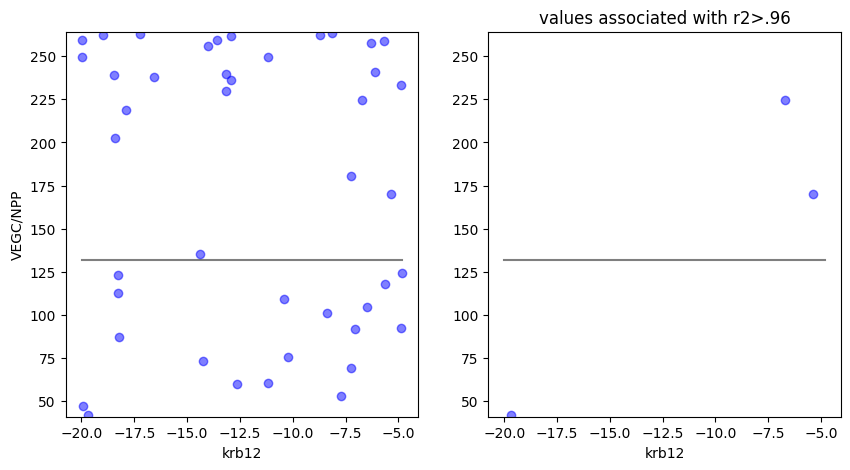

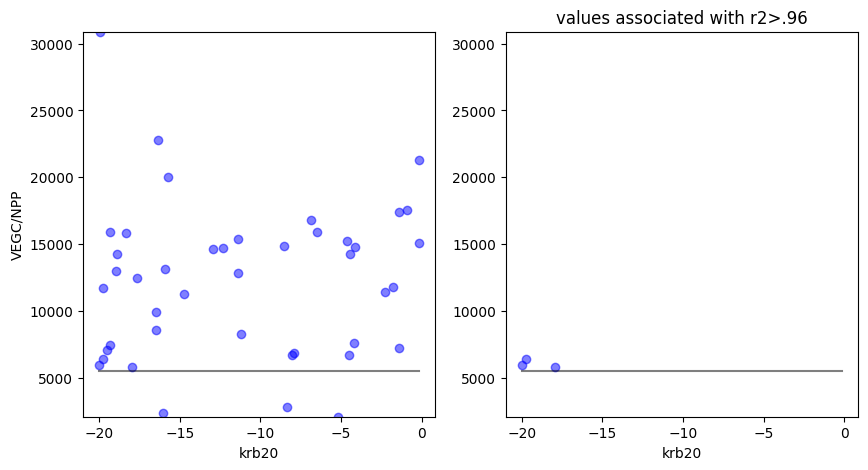

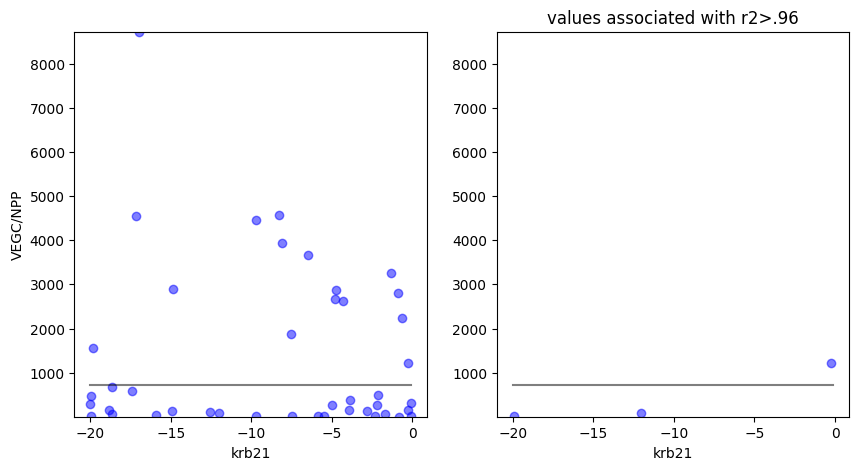

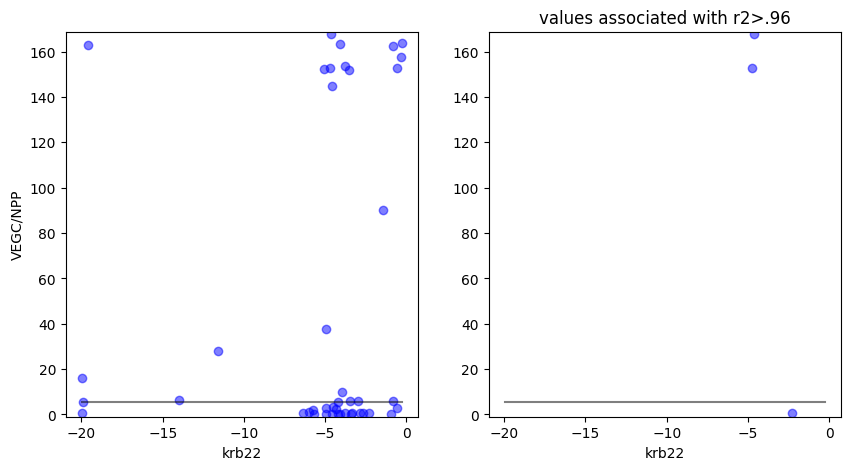

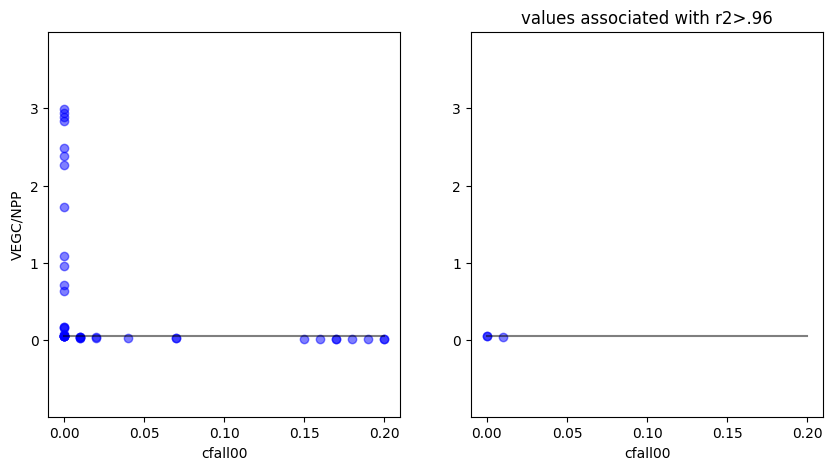

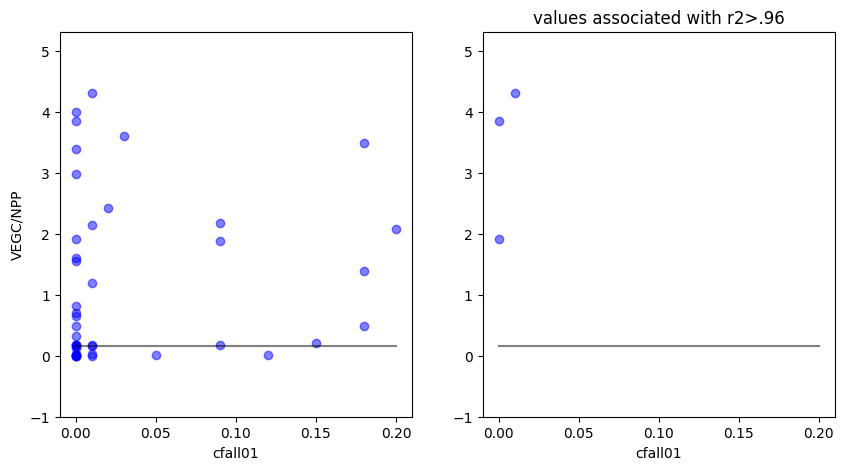

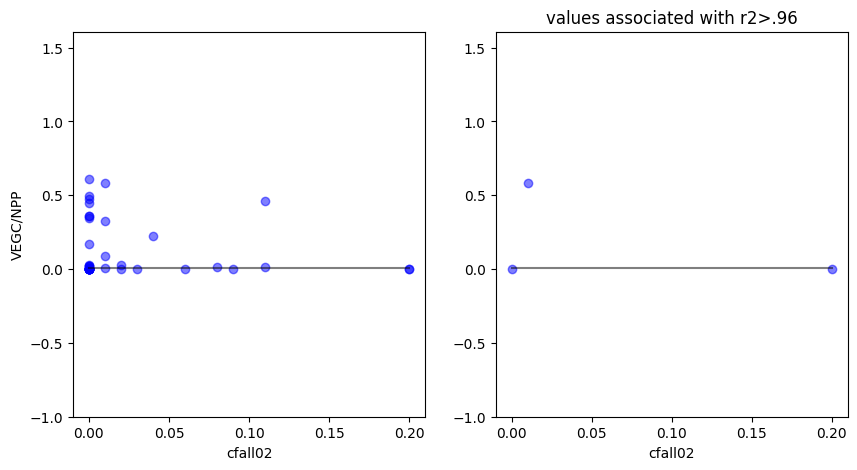

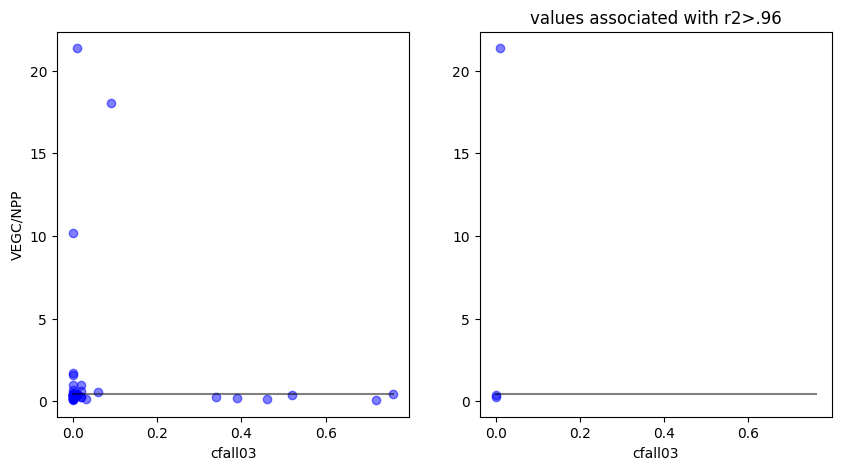

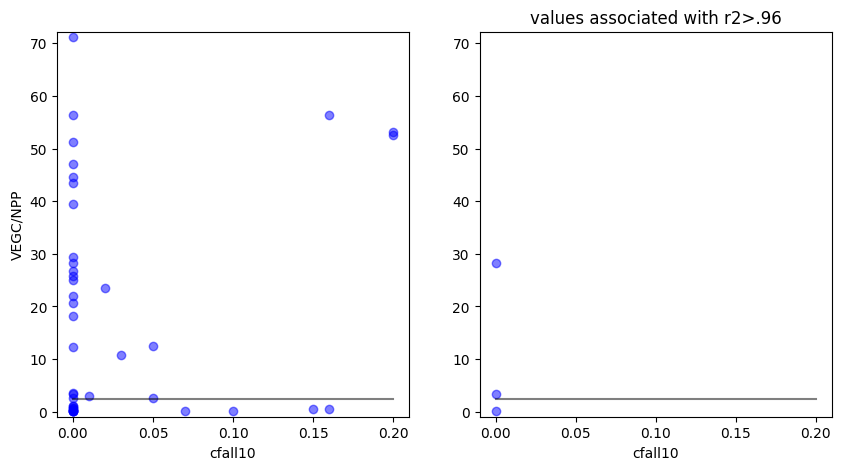

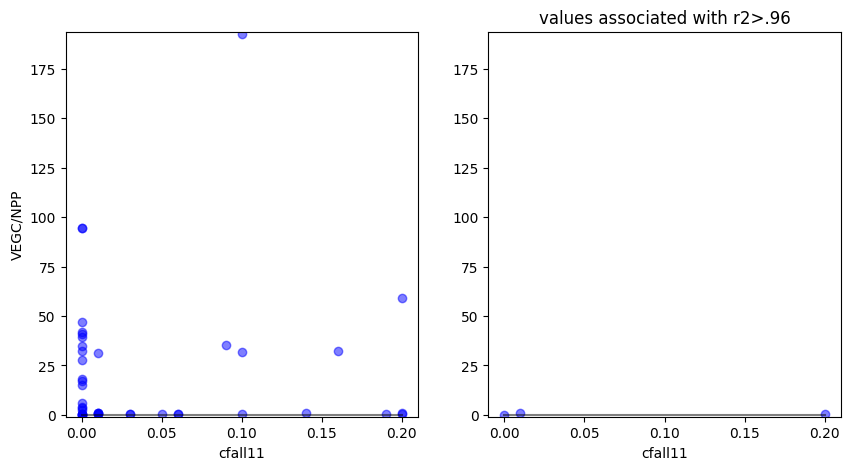

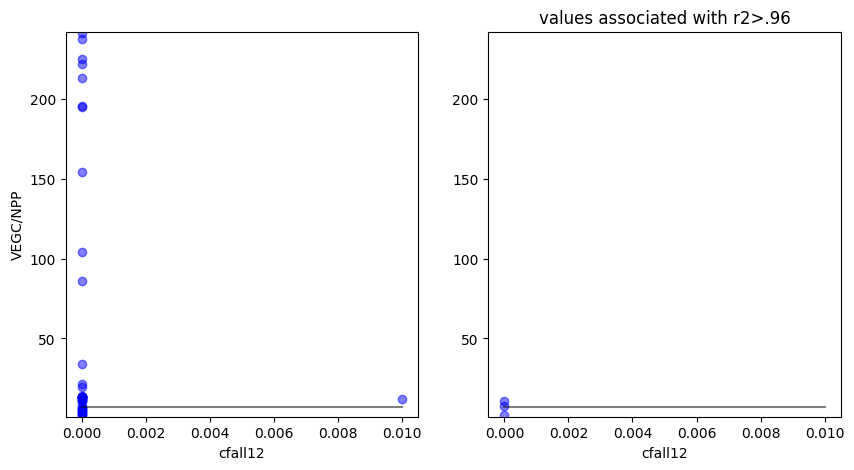

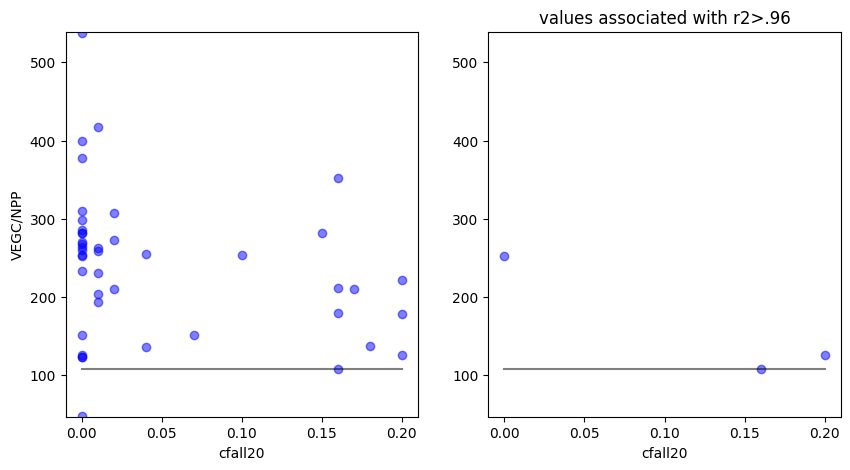

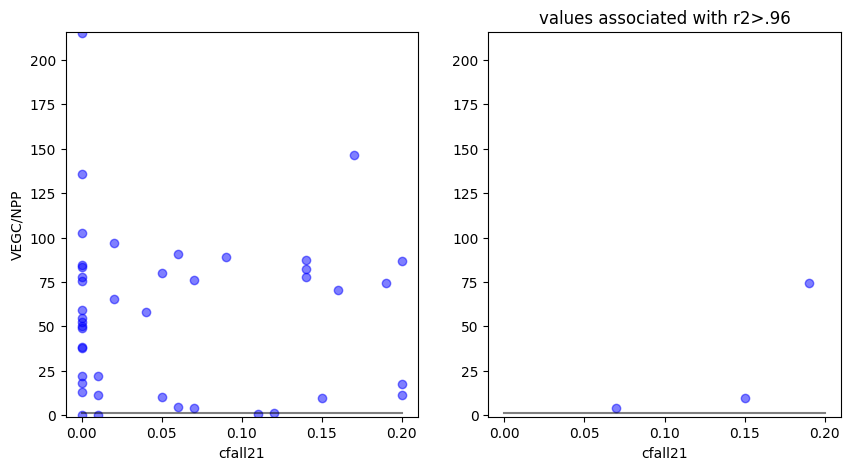

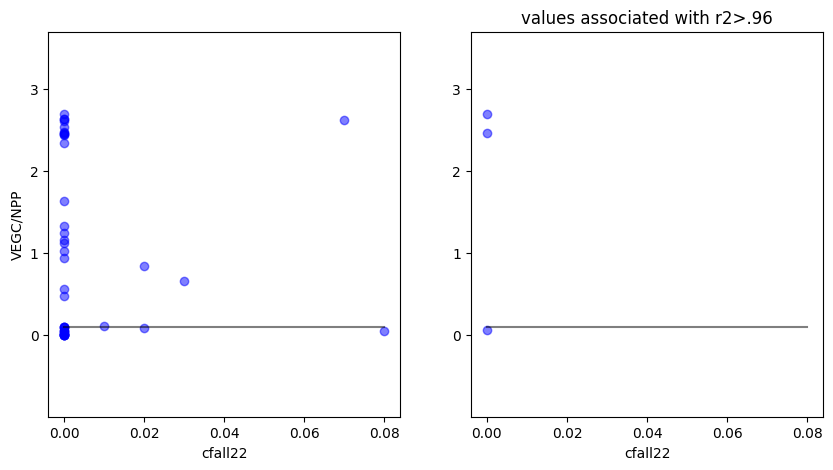

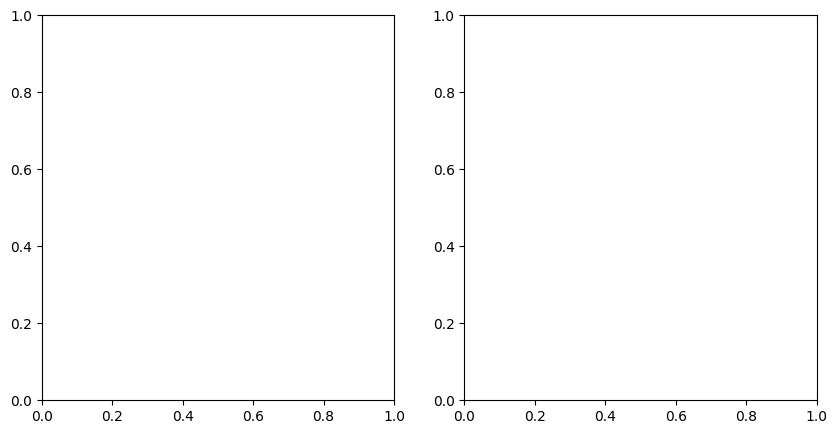

In [9]:
#this assumes a 1-1 relationship between obs and params
i=0
for item in mparams:
    plot_paramsvstarget(df_param,df_model,r2,i,xlabel=item,ylabel='VEGC/NPP')
    i=i+1